# 1. Business Understanding

# 2. Data Understanding

In [ ]:
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport
# from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

In [4]:
df = pd.read_csv("Covid Dataset.csv")

df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
# Langkah 3: Membuat laporan EDA menggunakan ydata-profiling
profile = ProfileReport(df, title="Laporan EDA Covid Dataset", explorative=True)


In [ ]:
# Langkah 5: Menampilkan laporan di notebook (opsional)
profile.to_notebook_iframe()

In [ ]:
AV = AutoViz_Class()

# Langkah 4: Membuat visualisasi otomatis
# Parameter pertama adalah path file, parameter kedua adalah DataFrame
# 'df' adalah DataFrame yang sudah dimuat
visual = AV.AutoViz(filename="", dfte=df, depVar="", verbose=2, lowess=False)


In [ ]:
# Langkah 4: Menghapus kolom yang spesifik jika ada dalam dataset
# columns_to_drop = ['Chronic Lung Disease', 'Gastrointestinal', 'Wearing Masks', 'Sanitization from Market']
# columns_to_drop = [col for col in columns_to_drop if col in df.columns]
# df.drop(columns=columns_to_drop, inplace=True)
df = df.drop('Chronic Lung Disease', axis=1)
df = df.drop('Gastrointestinal', axis=1)
df = df.drop('Wearing Masks', axis=1)
df = df.drop('Sanitization from Market', axis=1)


In [ ]:
# Overview of dataset structure and summary statistics
df.info()

In [ ]:
# Overview of dataset structure and summary statistics
df.info()

In [ ]:
# Langkah 4: Menyimpan laporan ke file HTML
profile.to_file("eda_report.html")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            

<Figure size 1000x600 with 0 Axes>

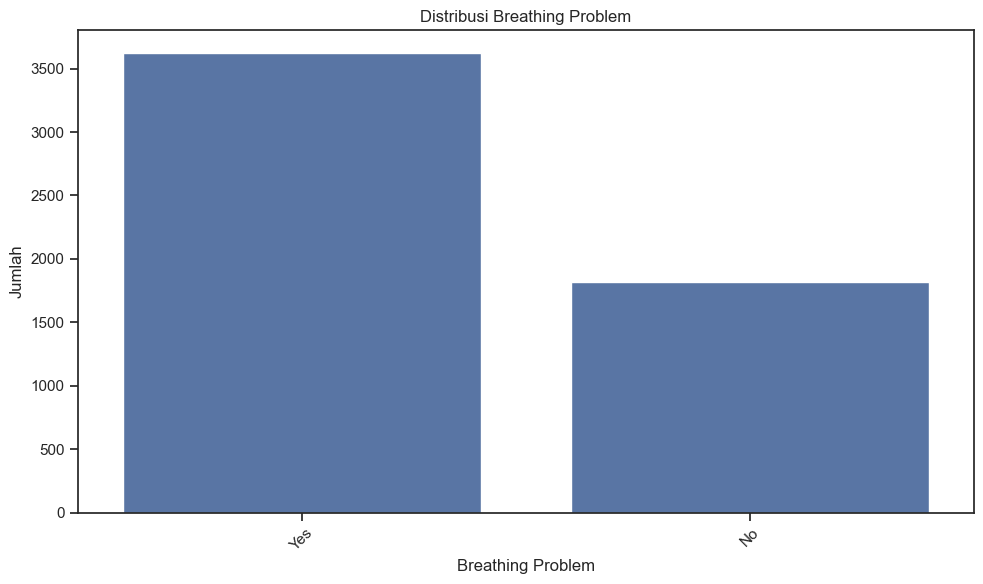

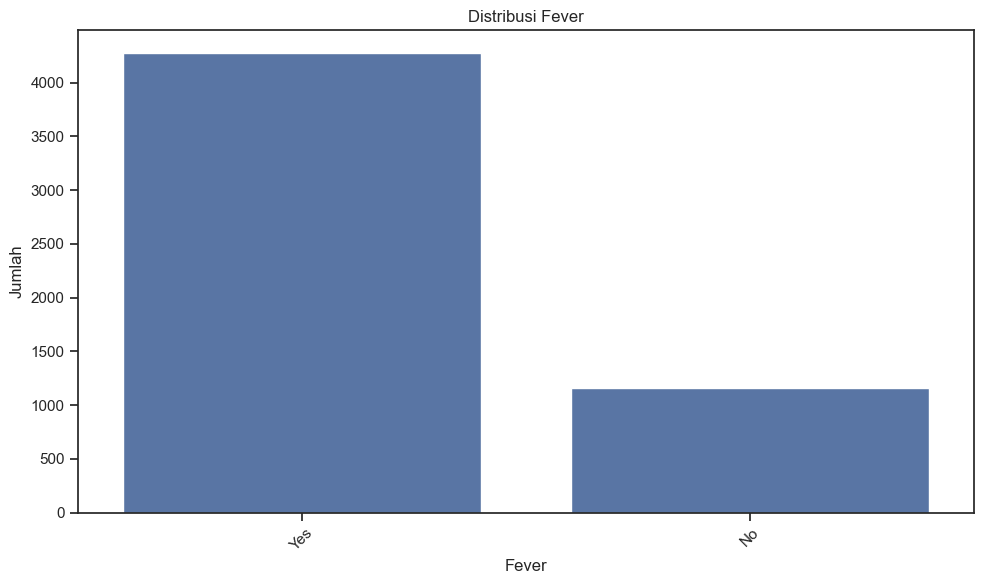

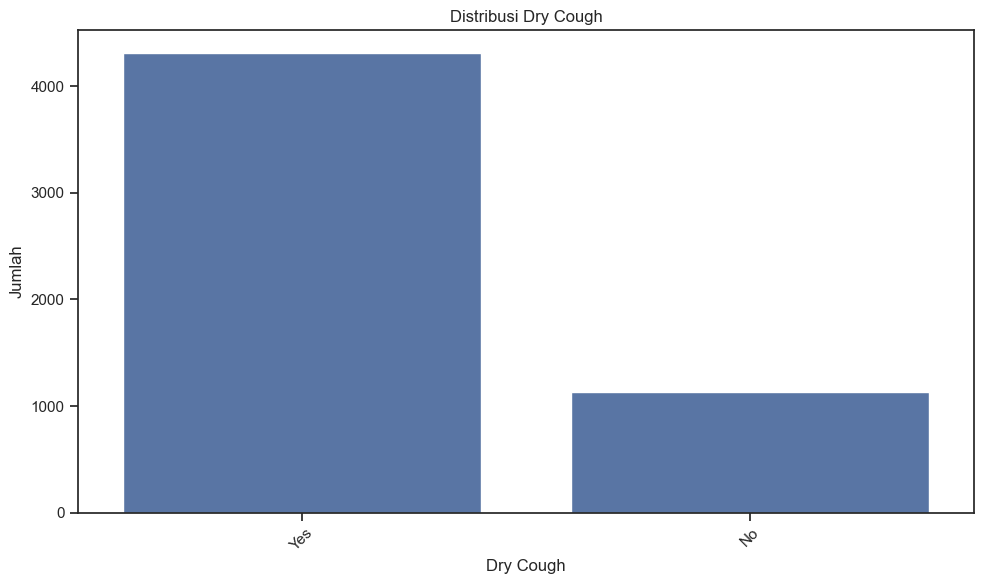

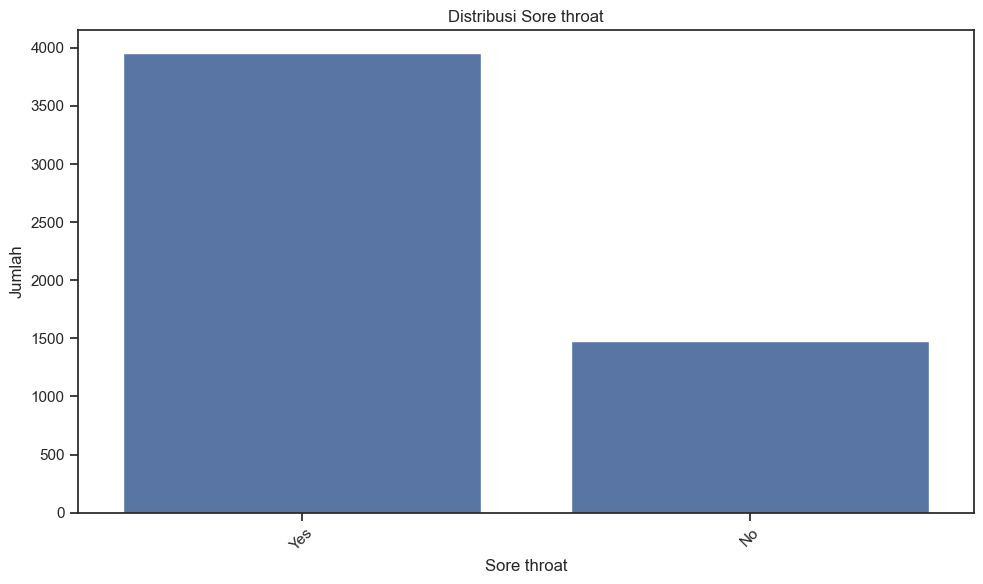

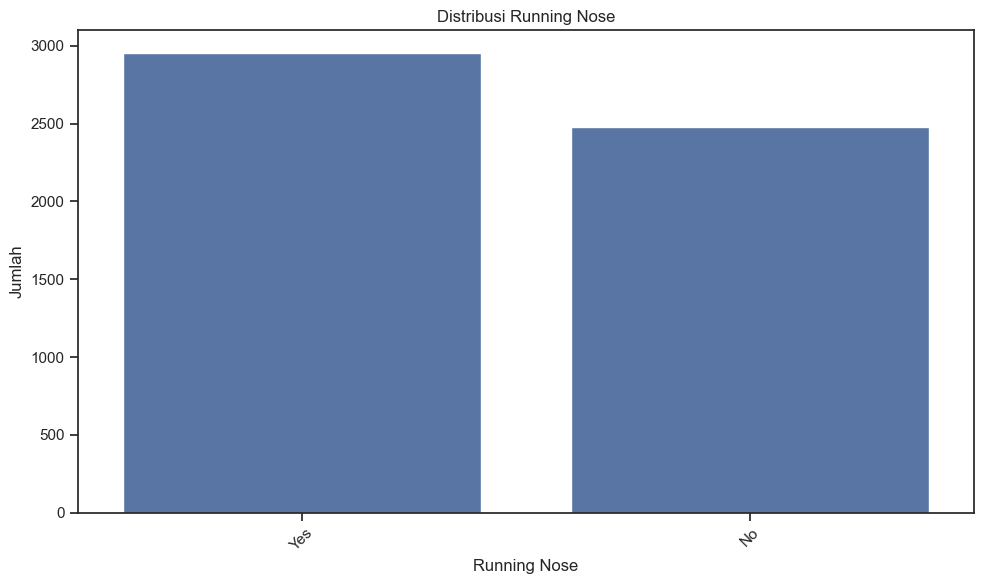

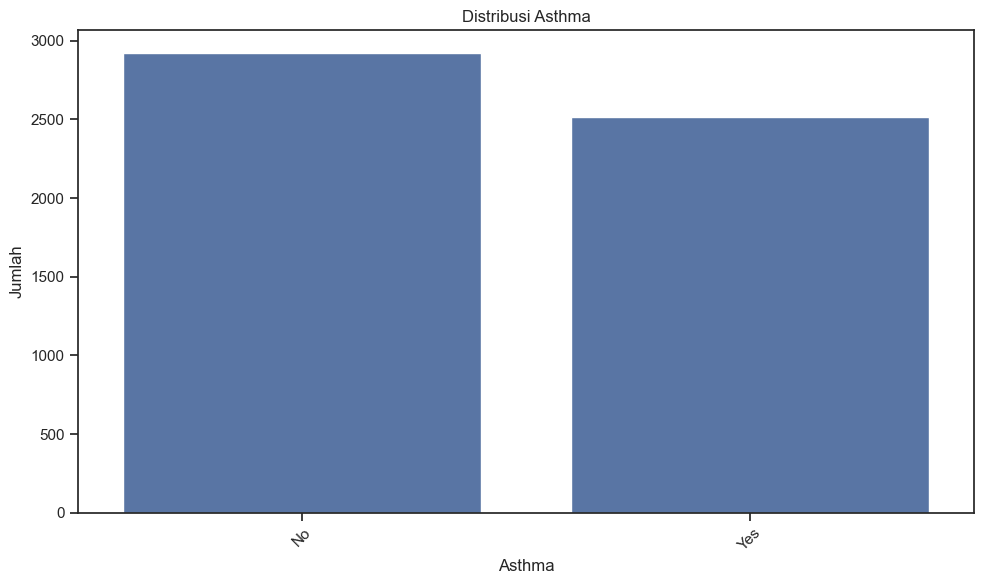

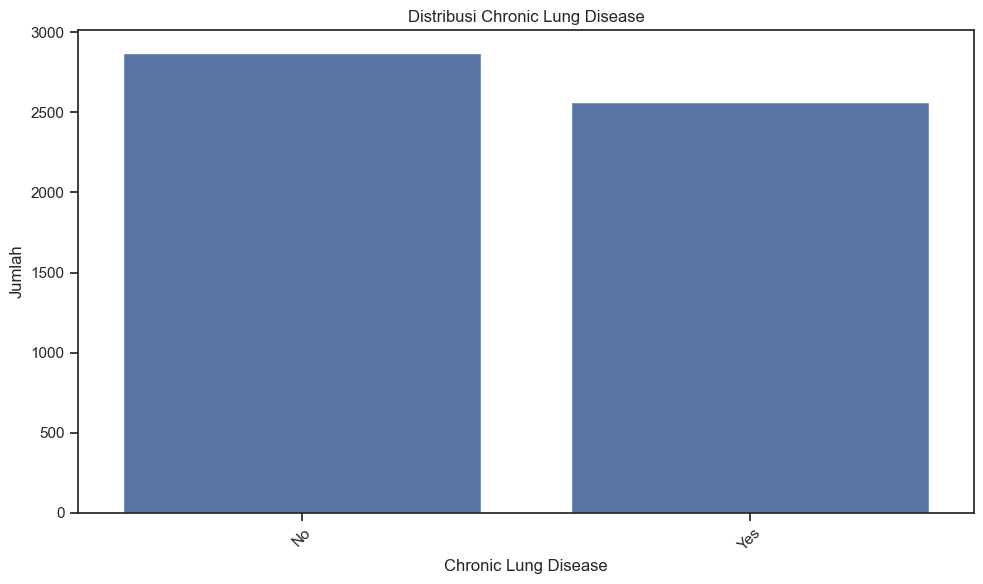

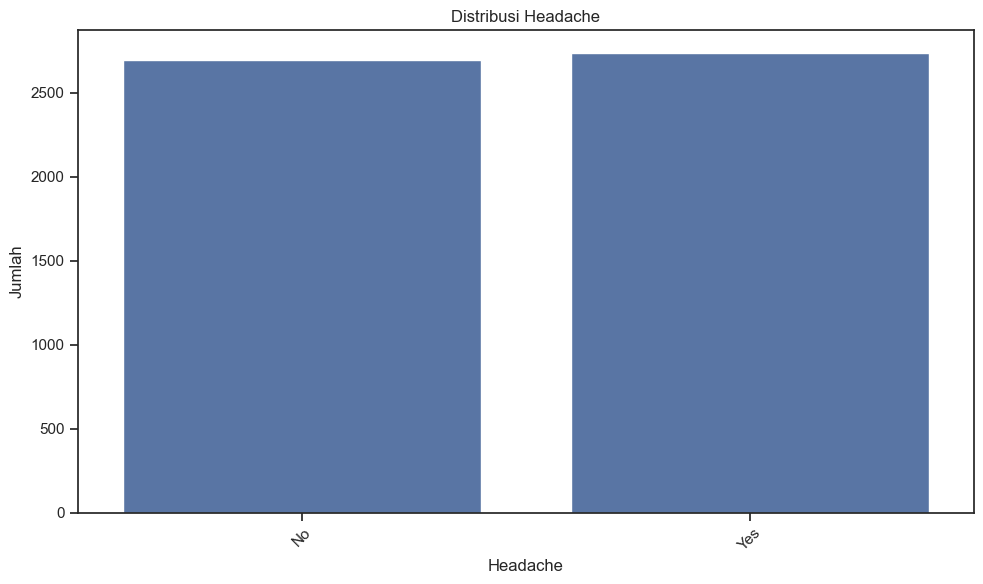

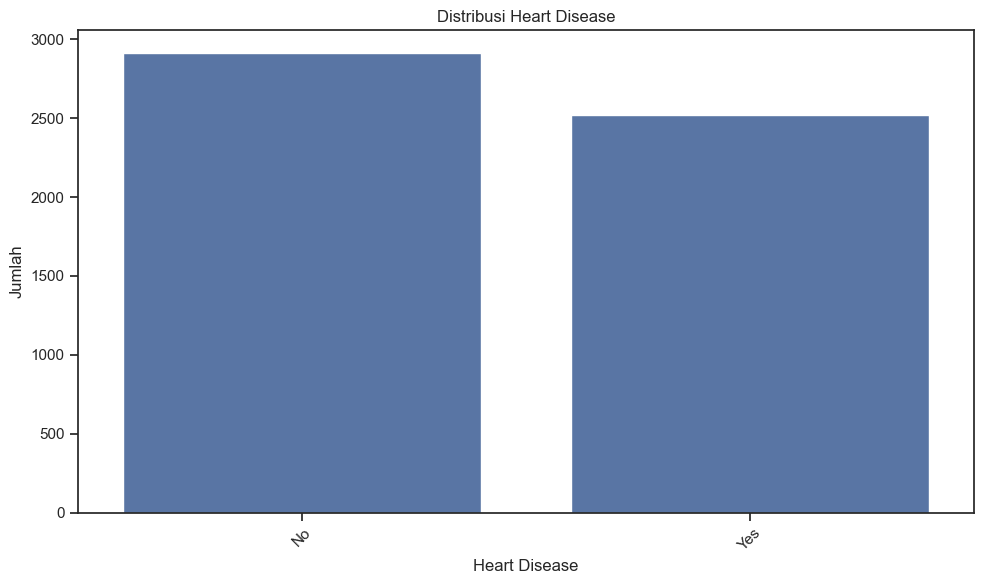

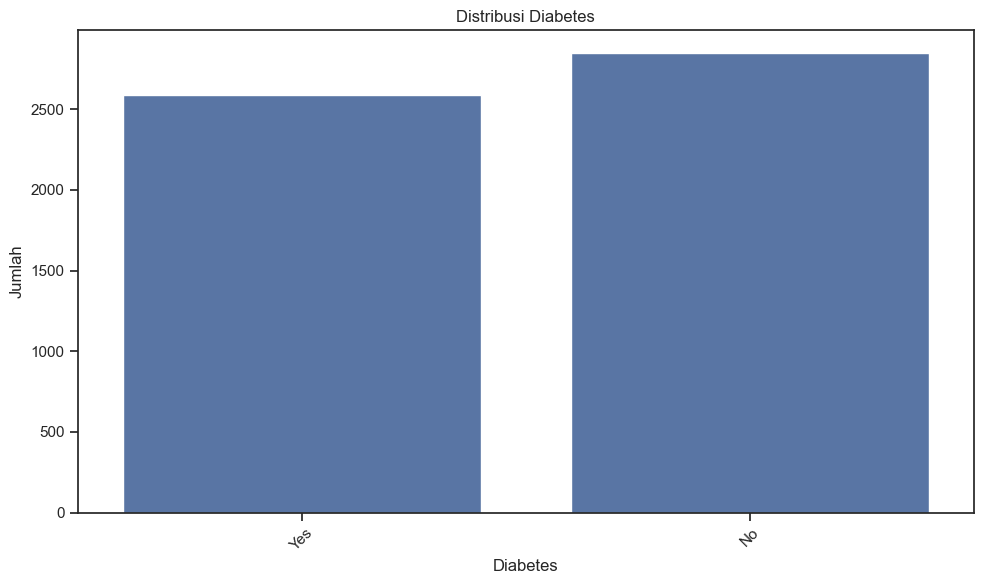

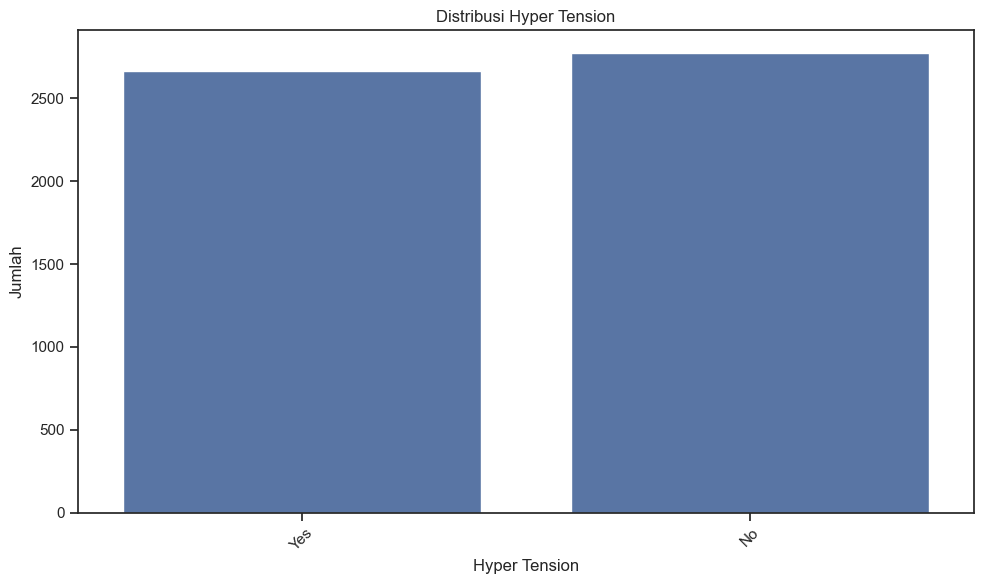

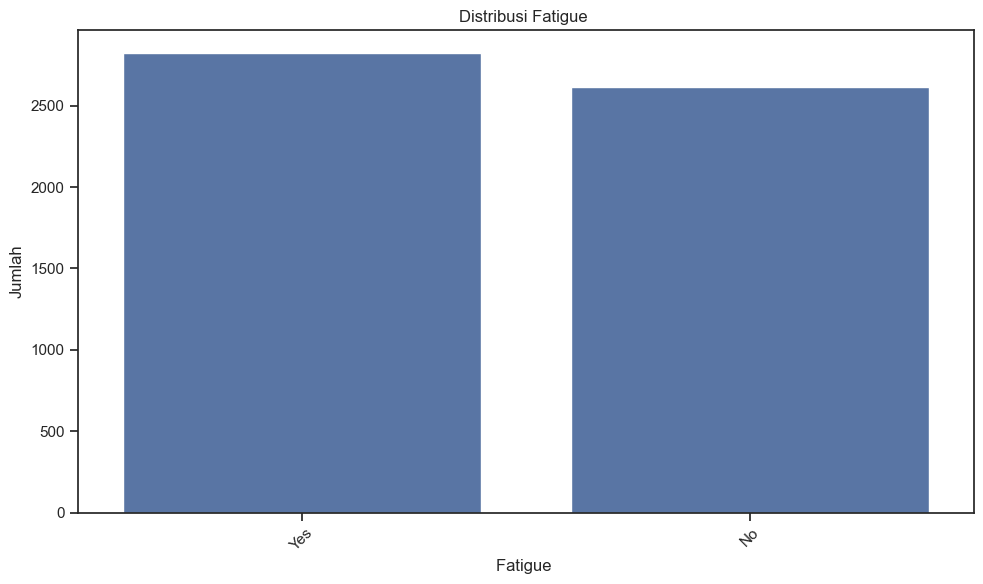

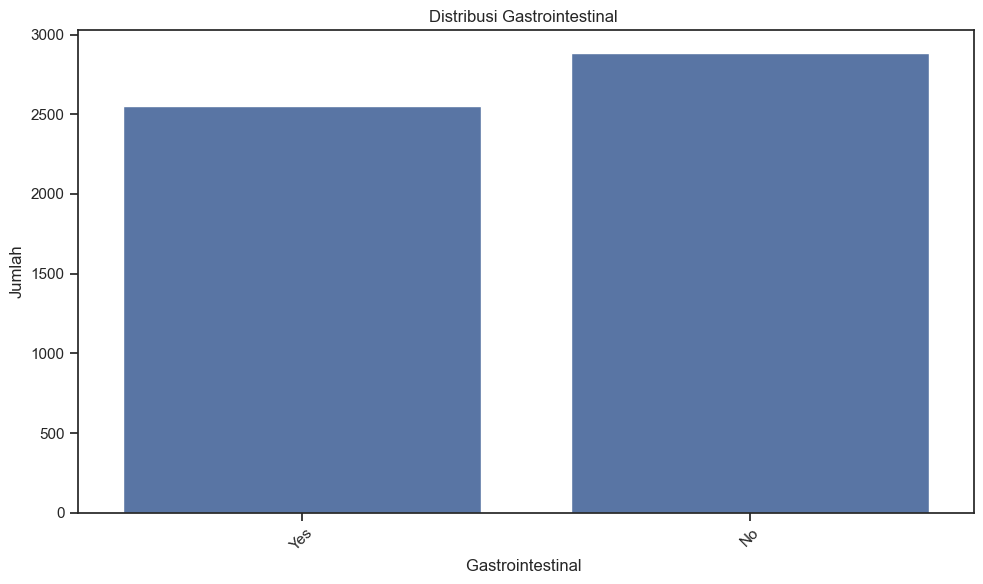

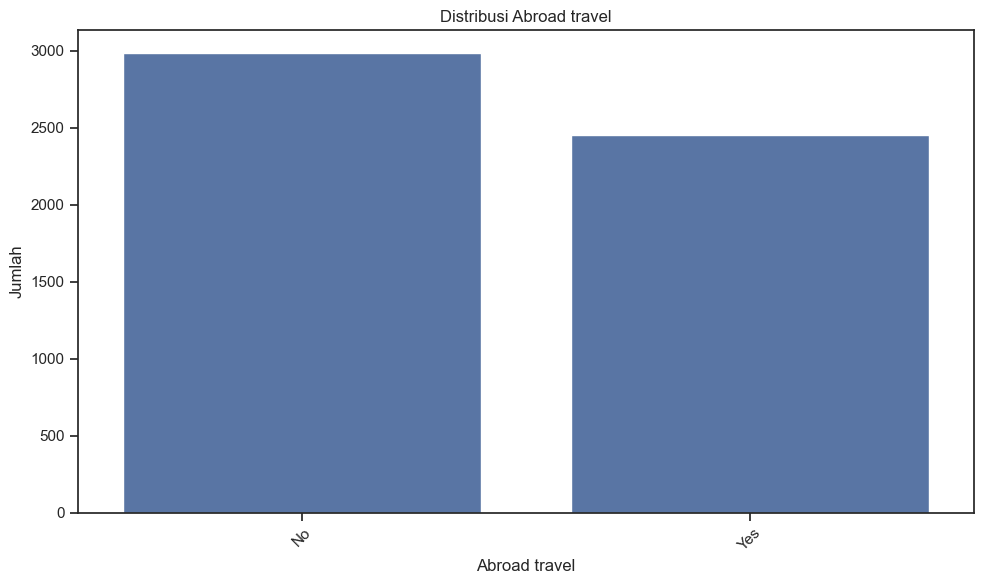

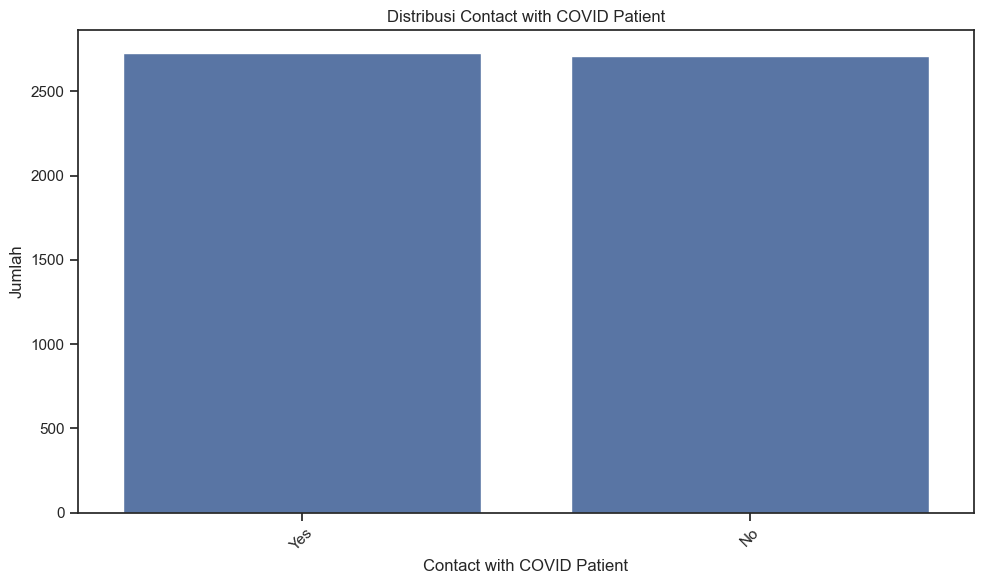

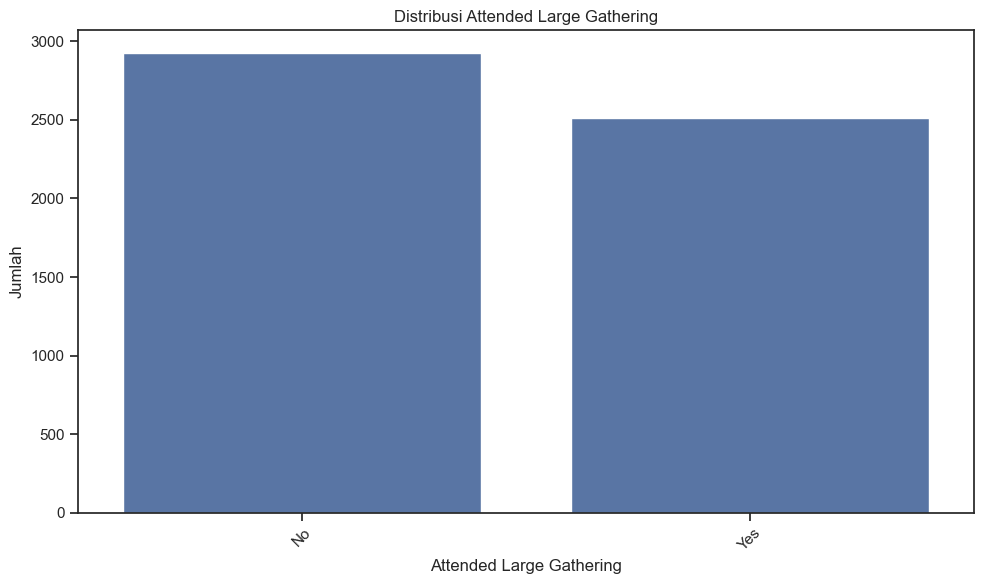

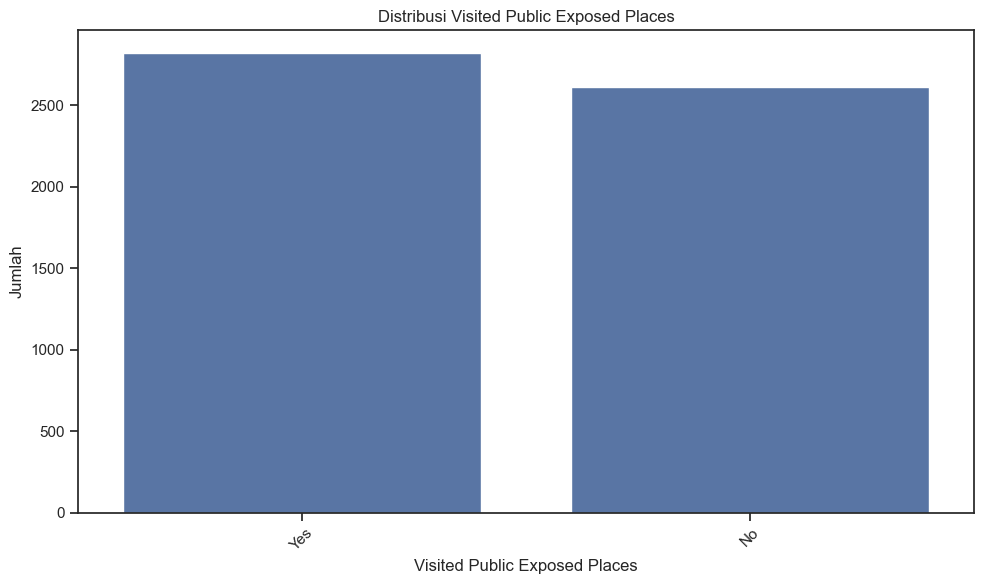

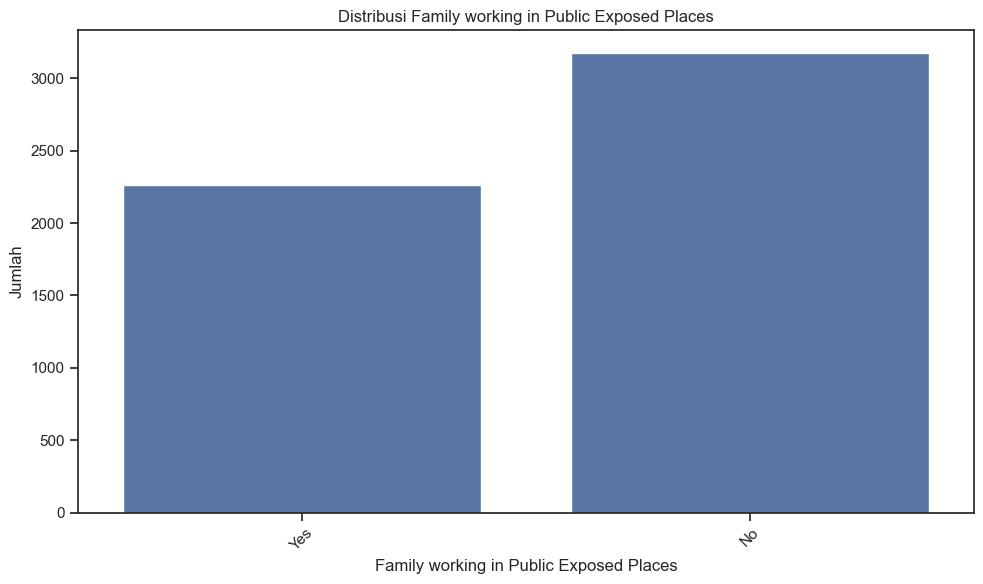

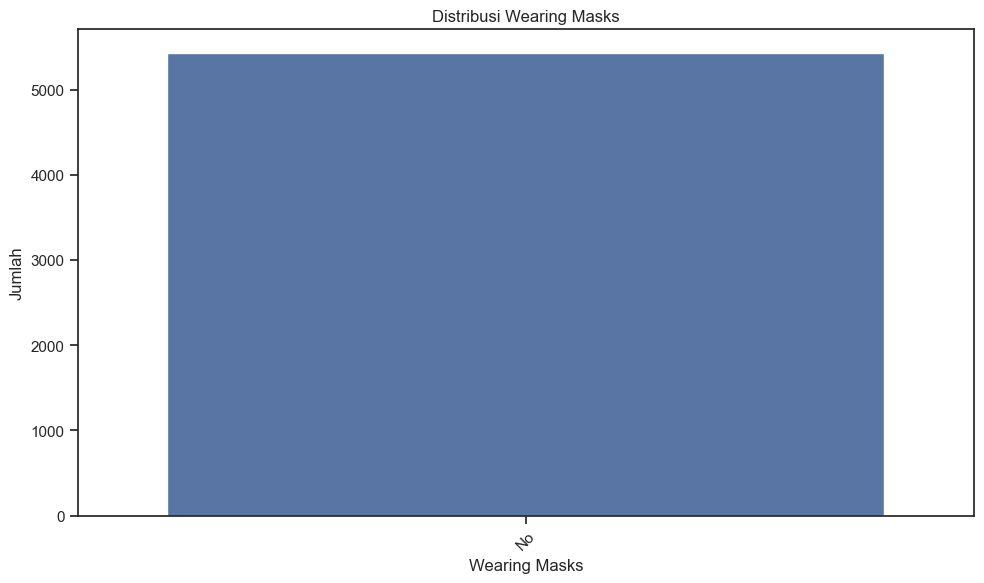

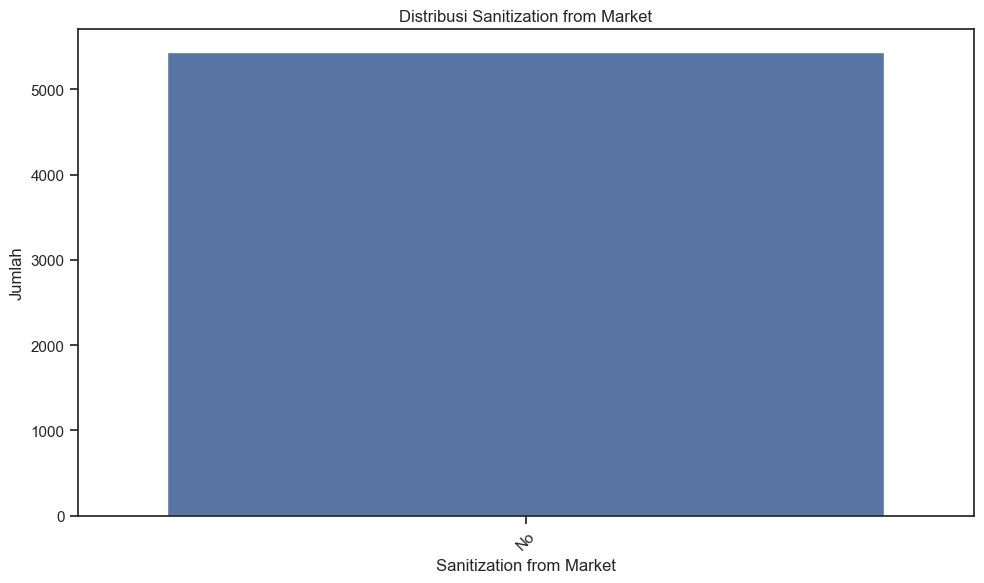

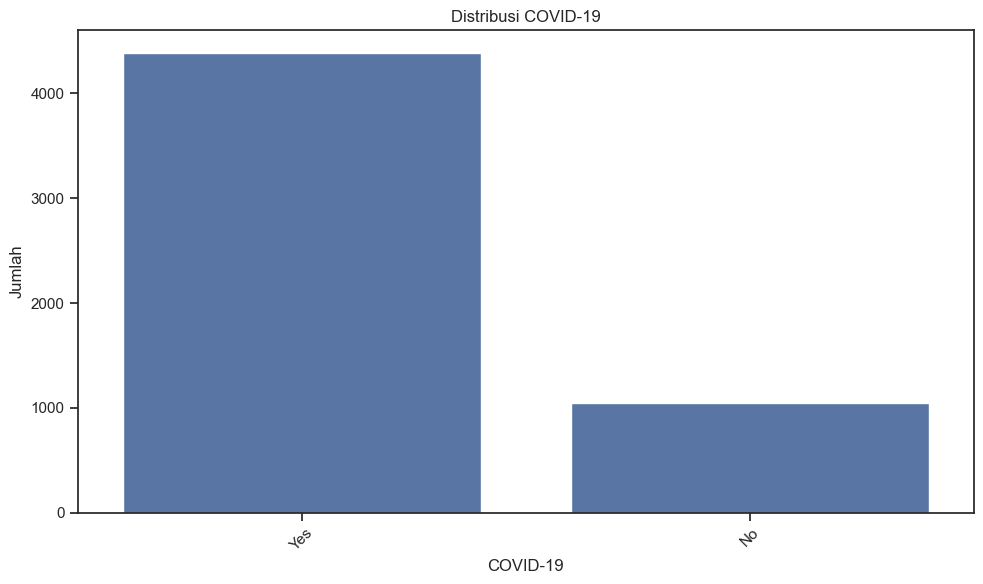

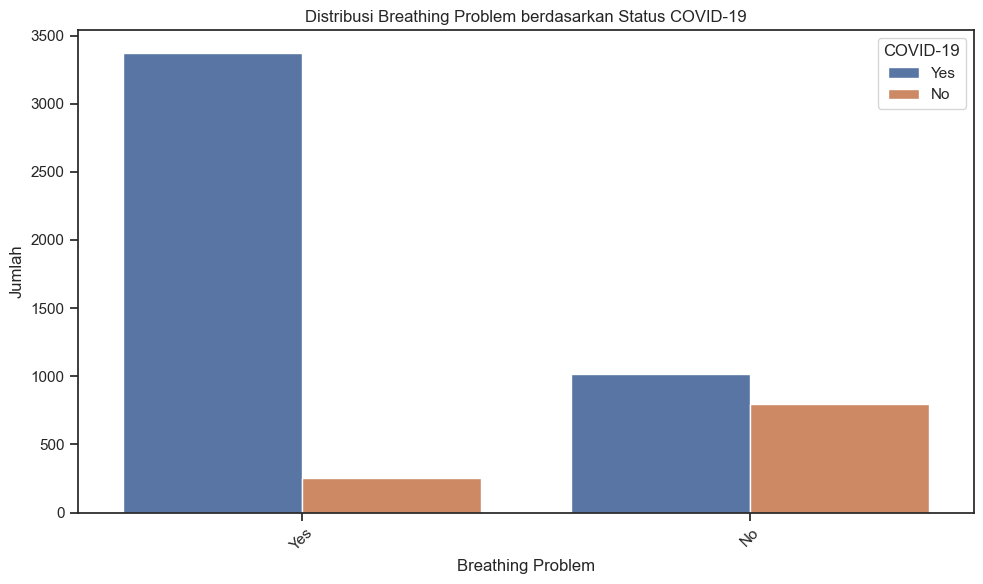

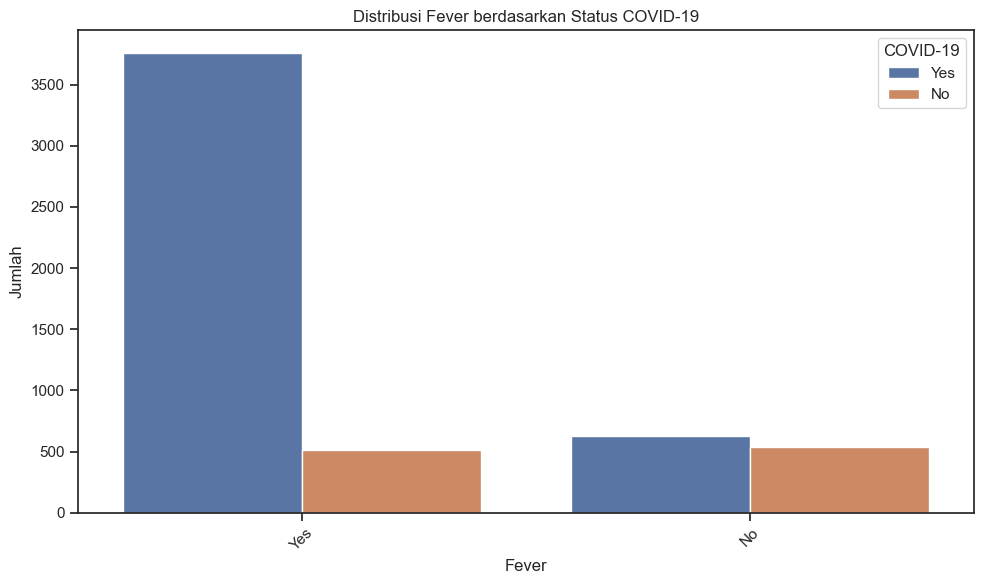

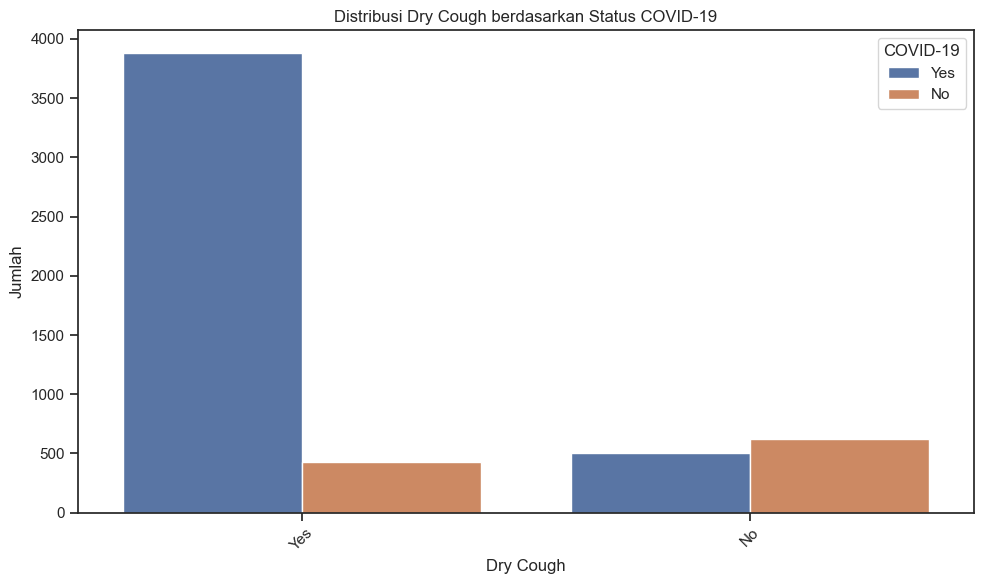

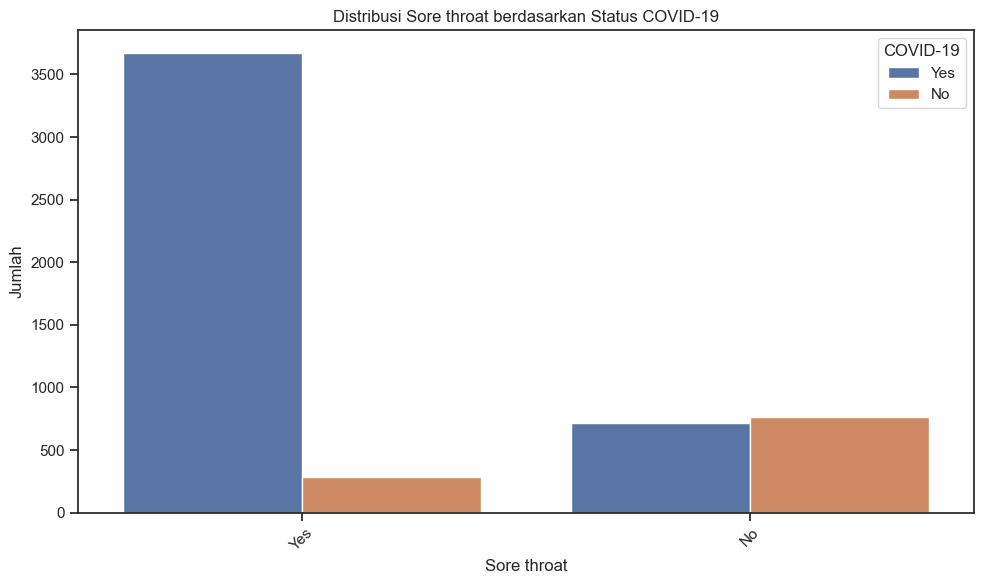

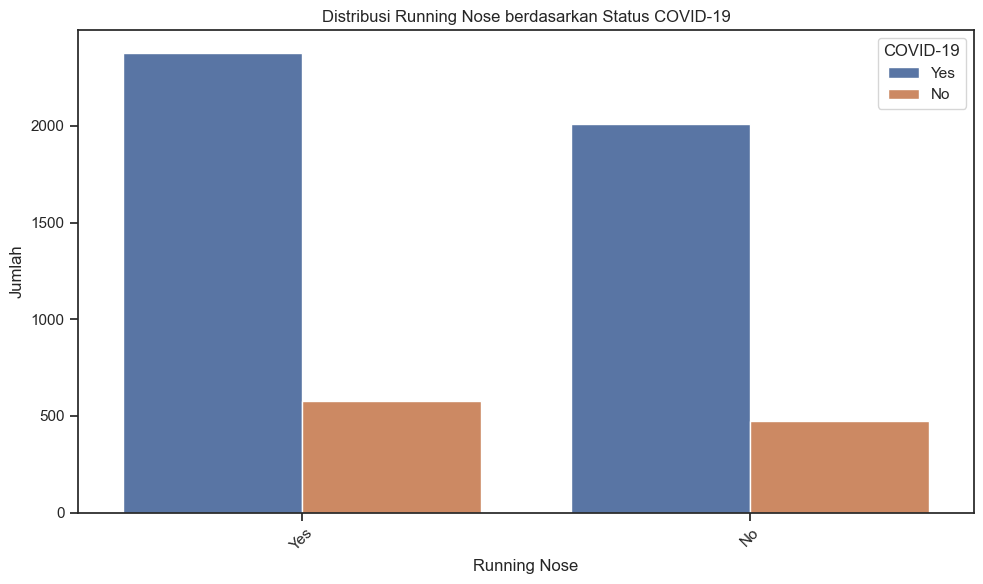

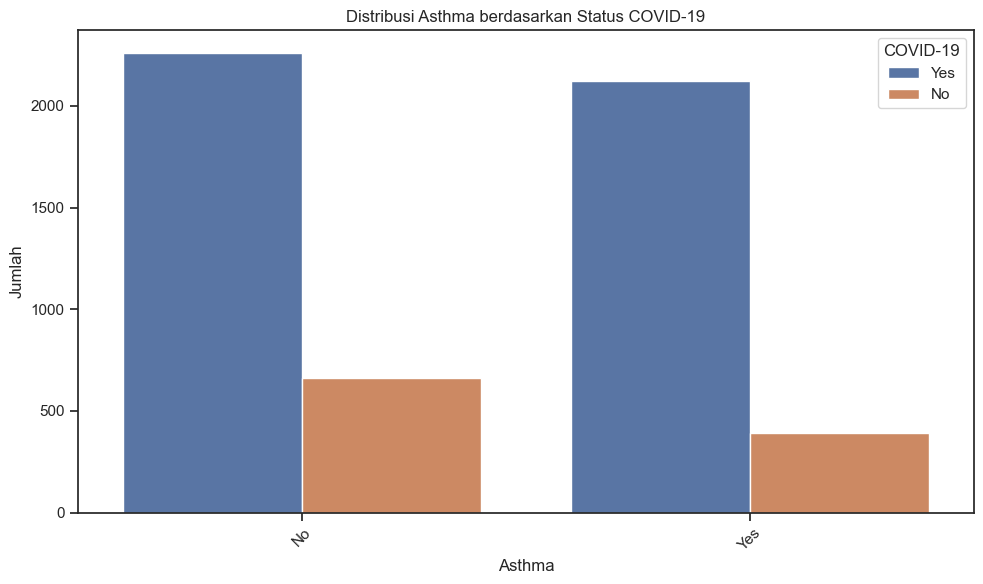

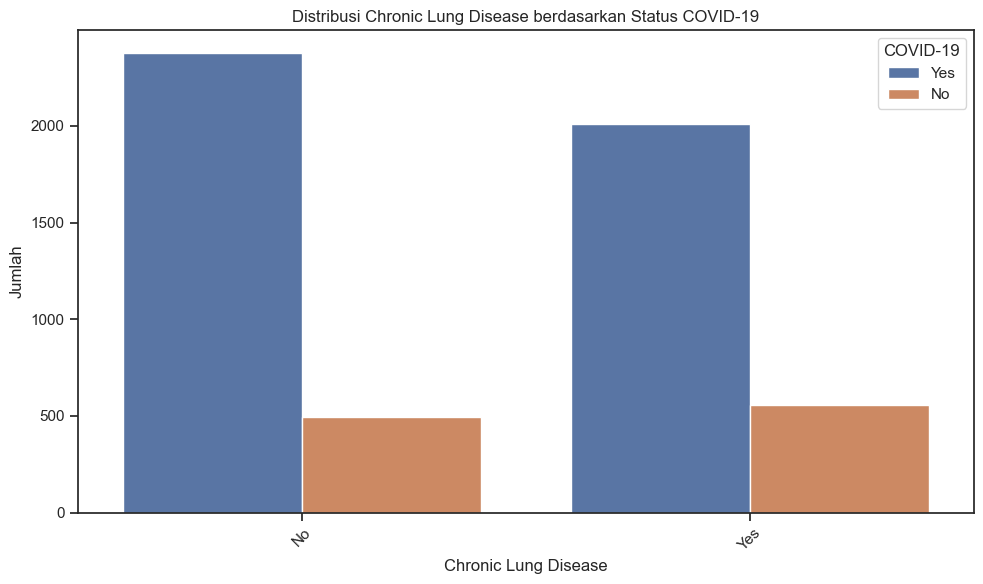

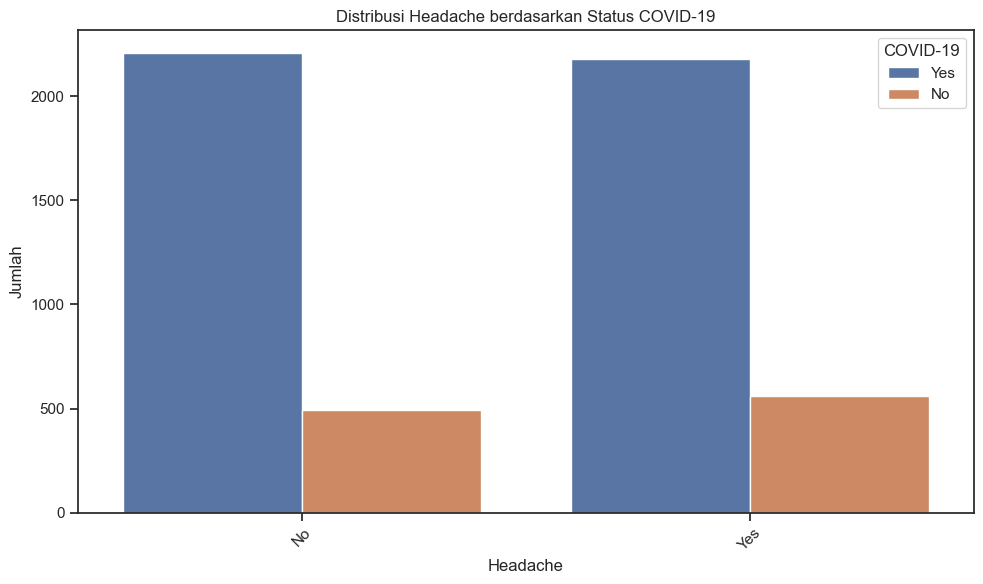

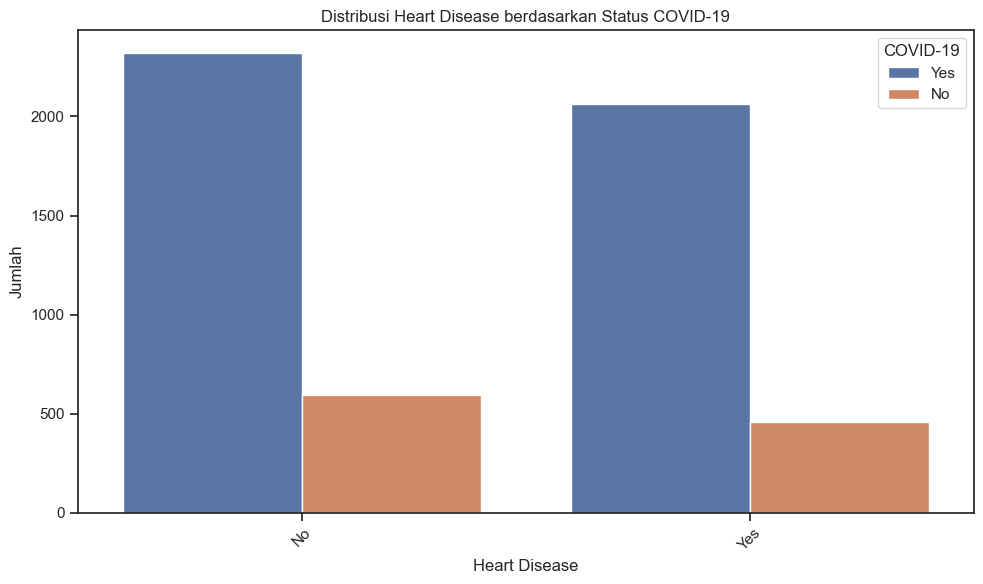

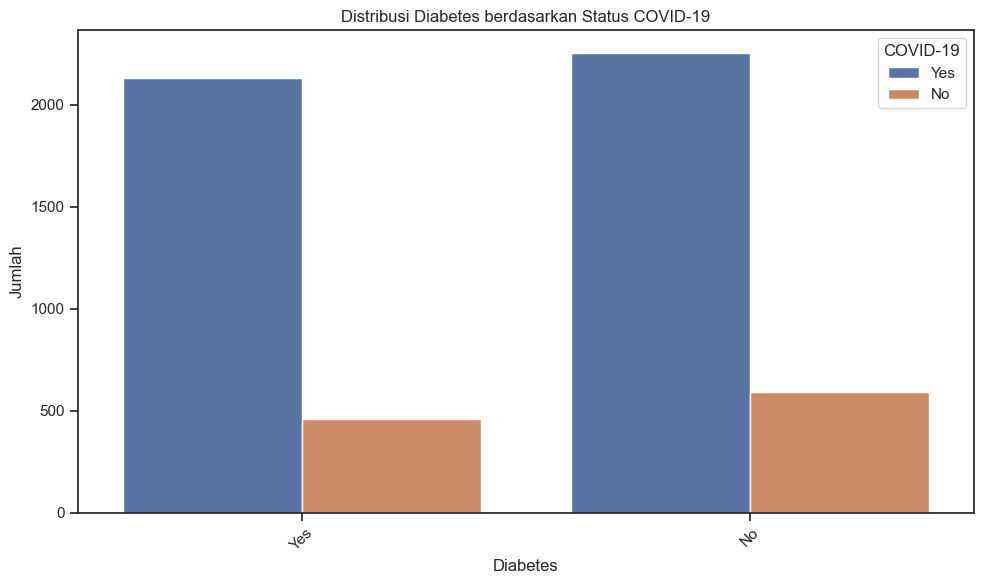

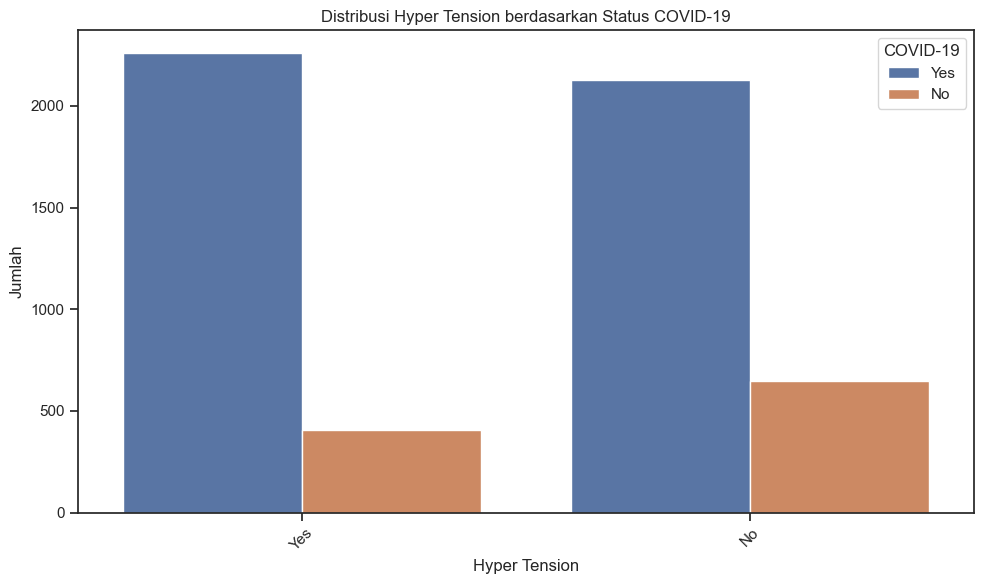

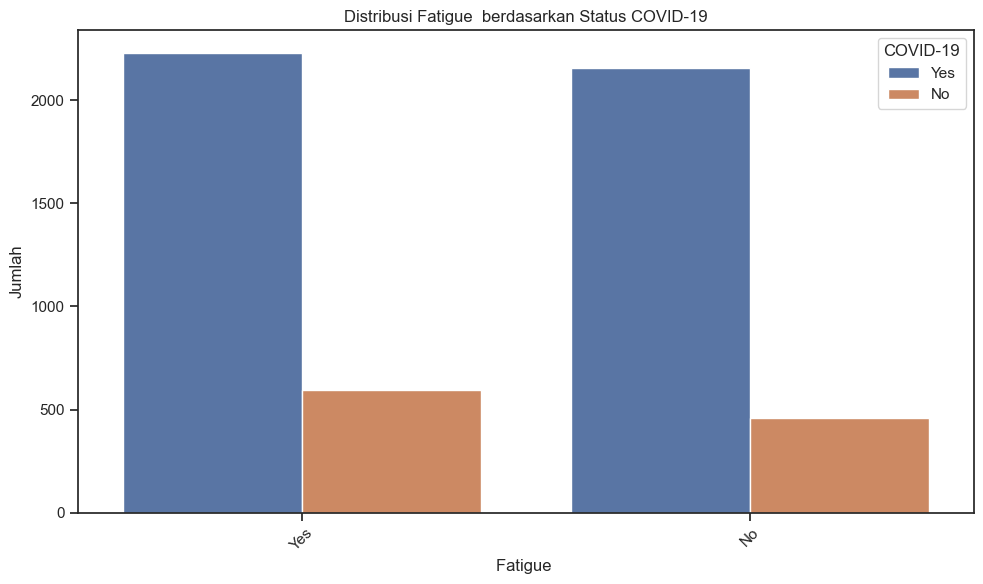

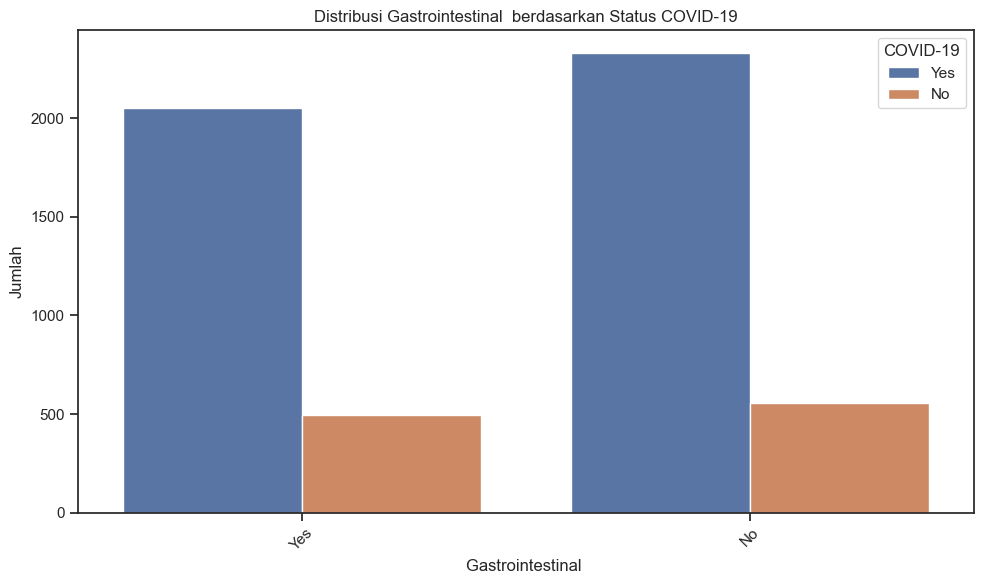

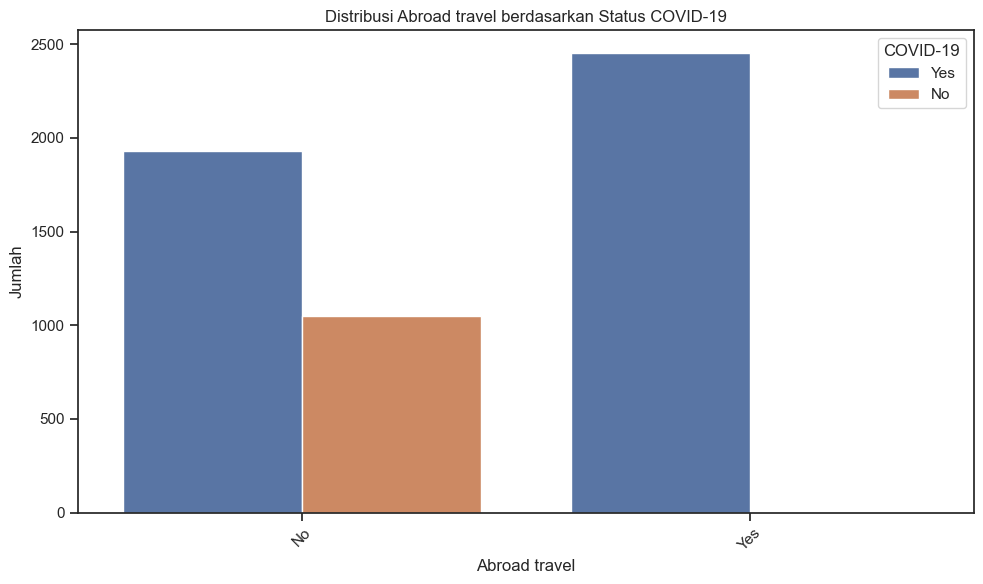

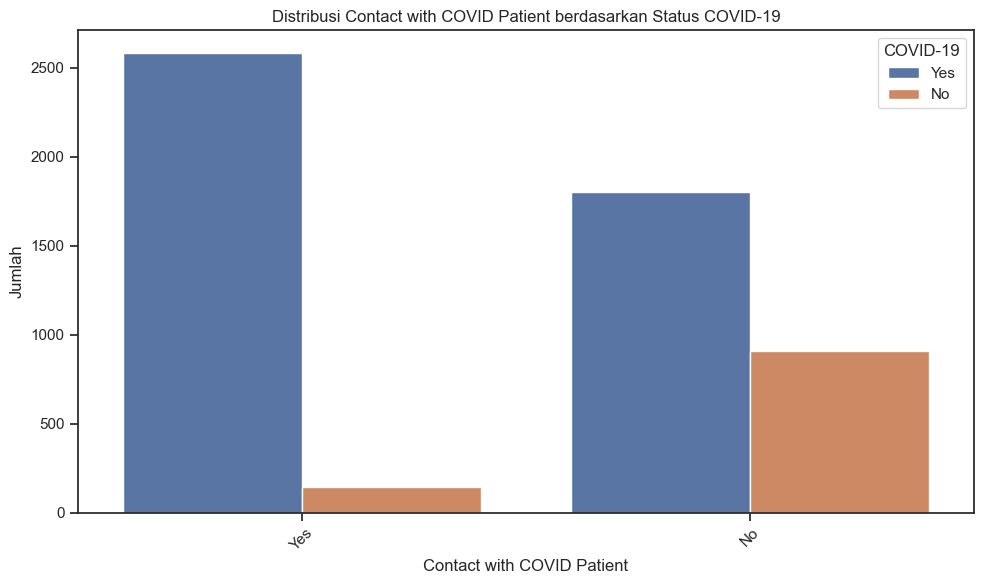

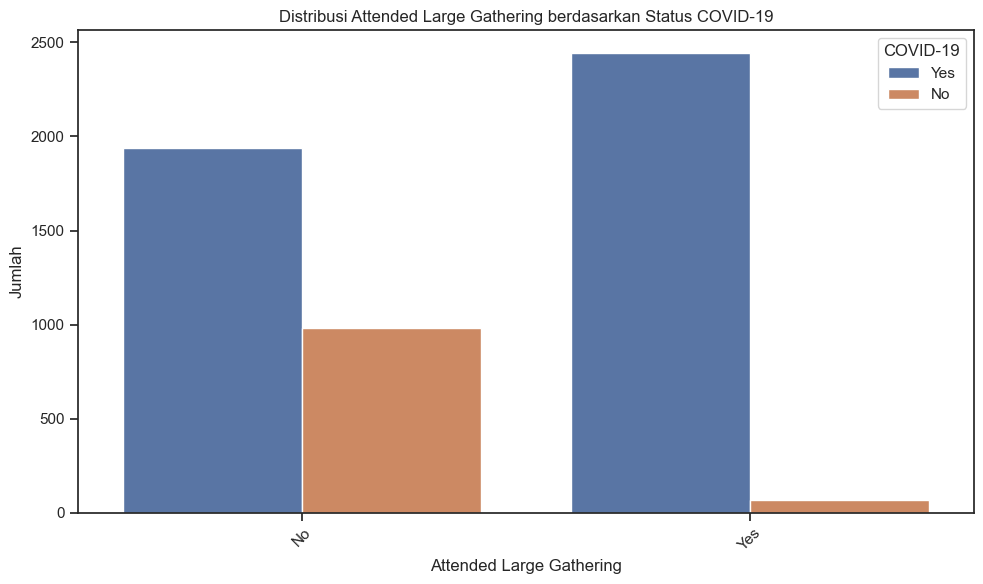

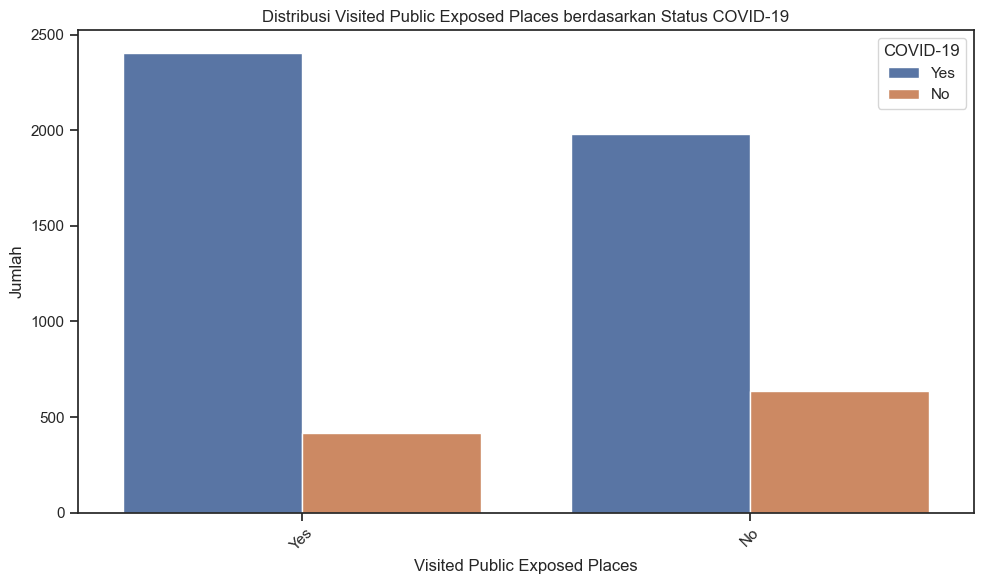

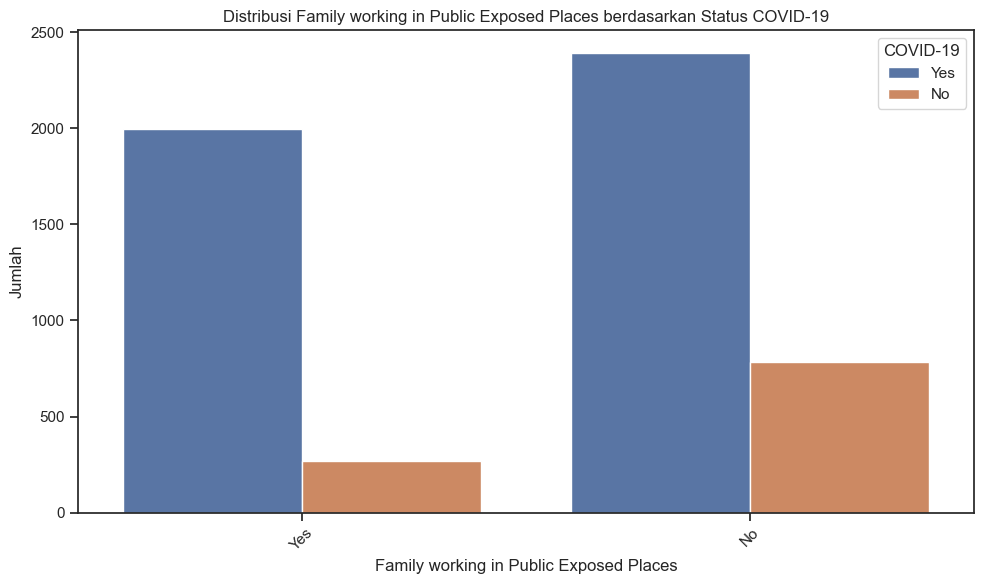

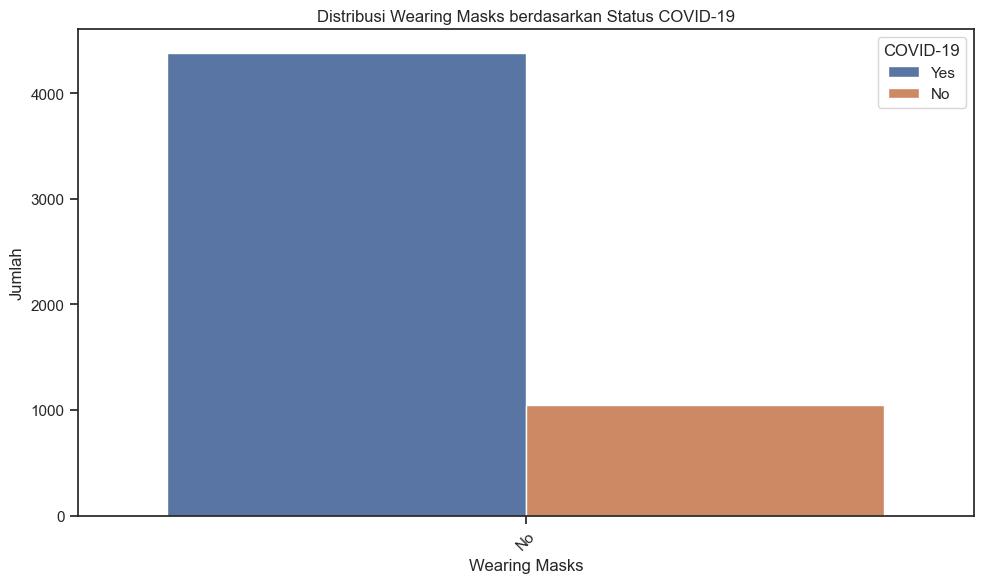

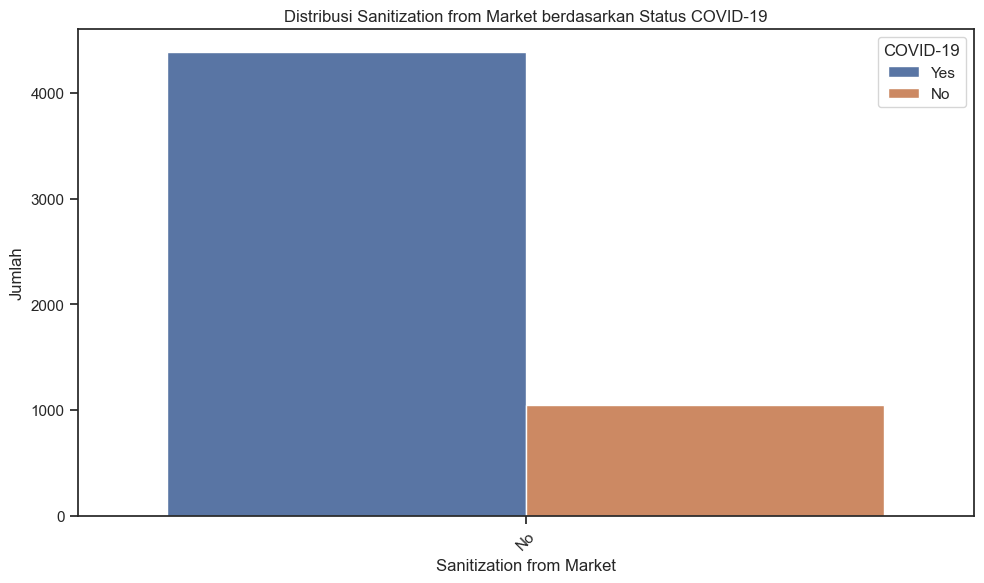

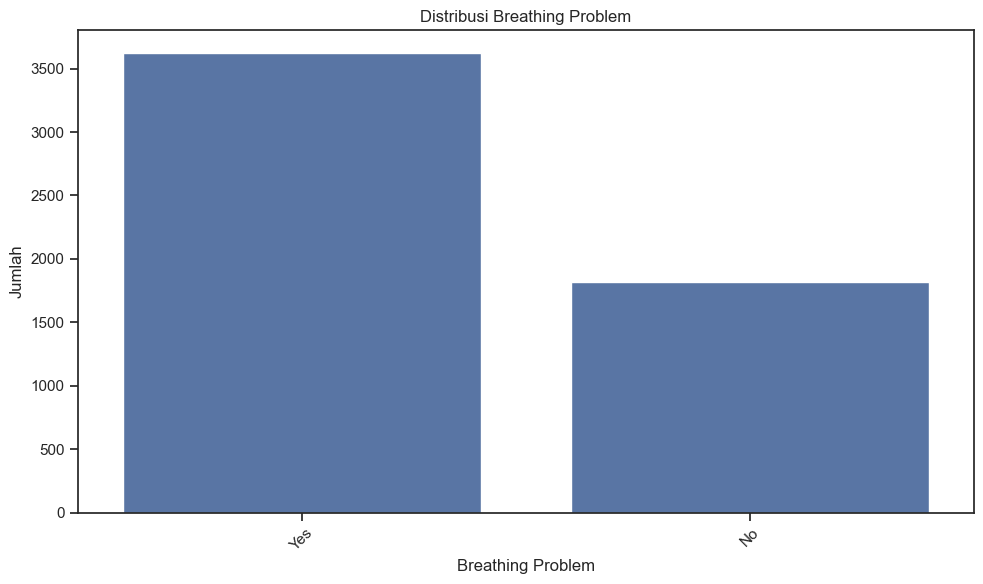

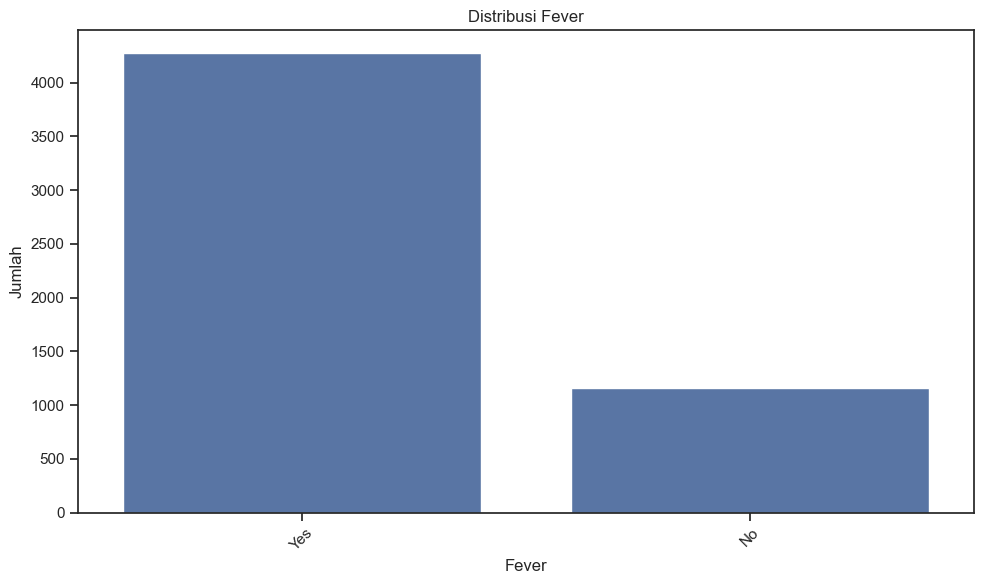

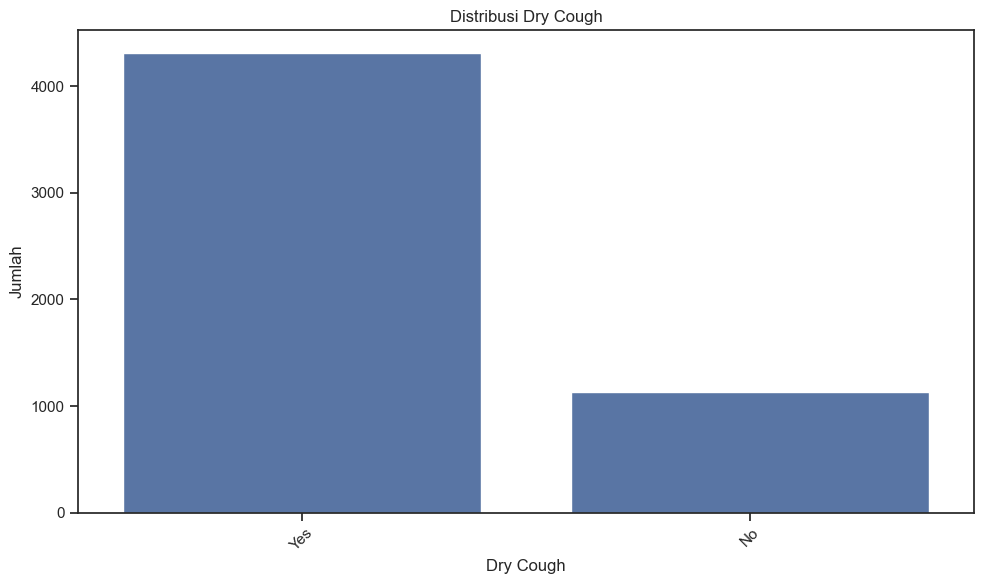

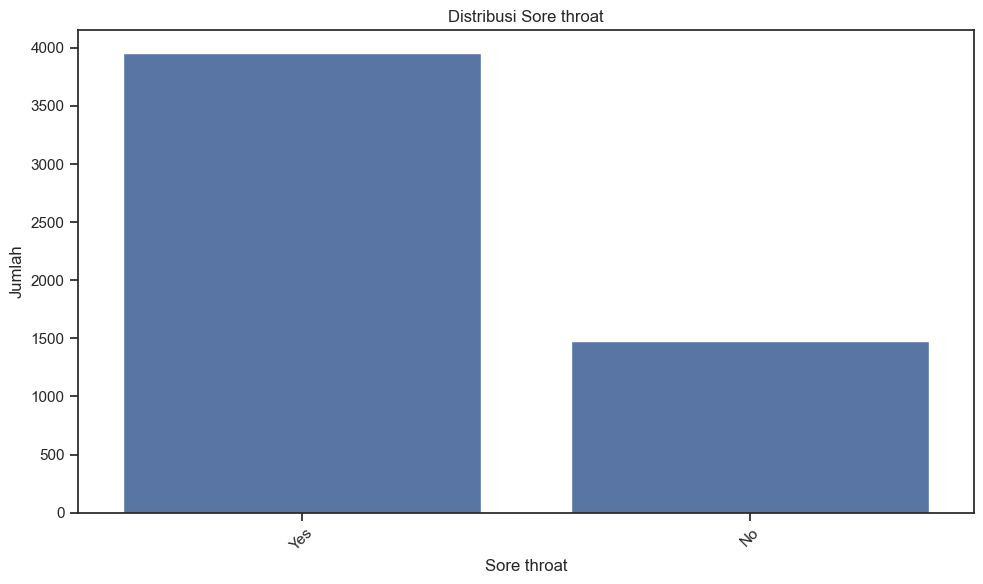

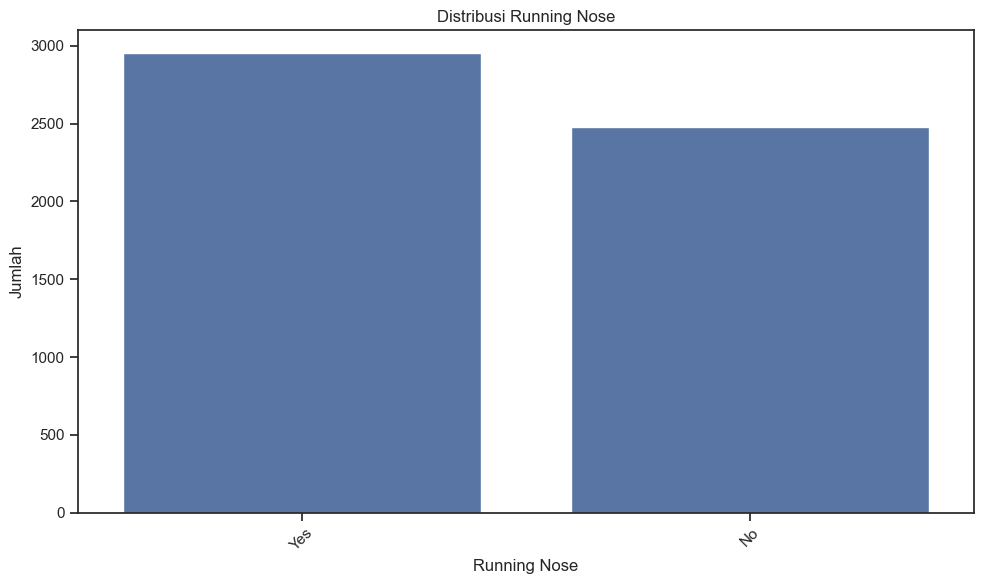

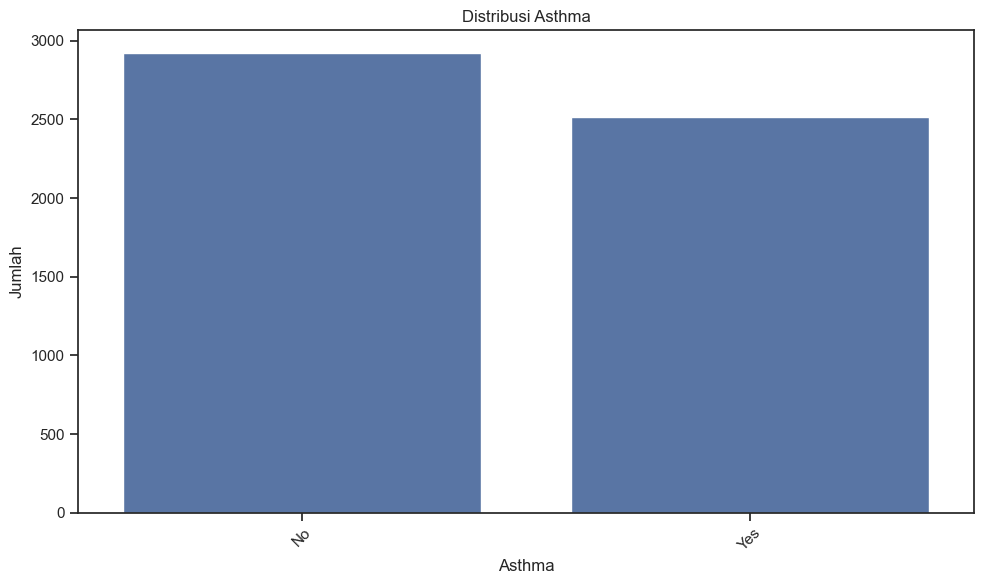

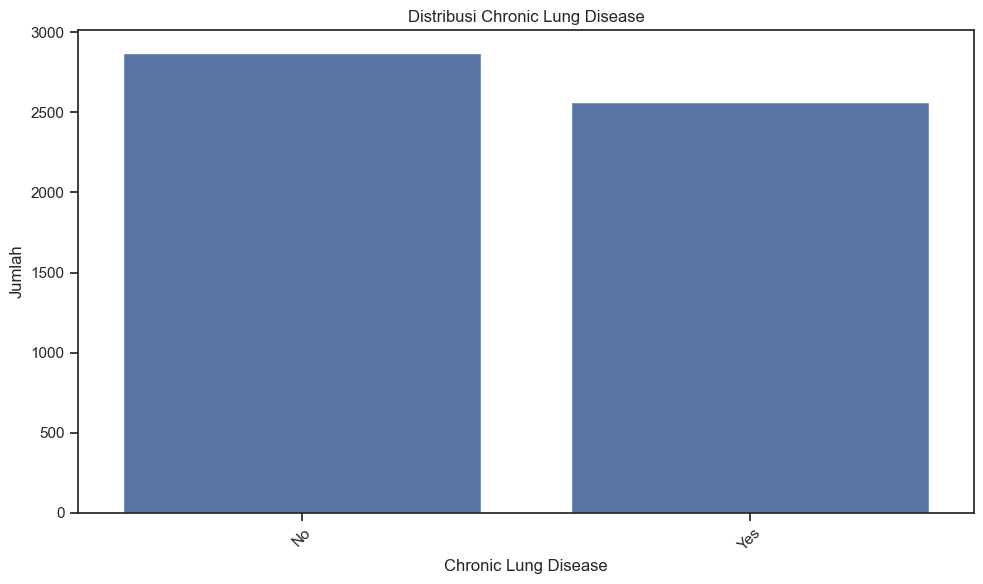

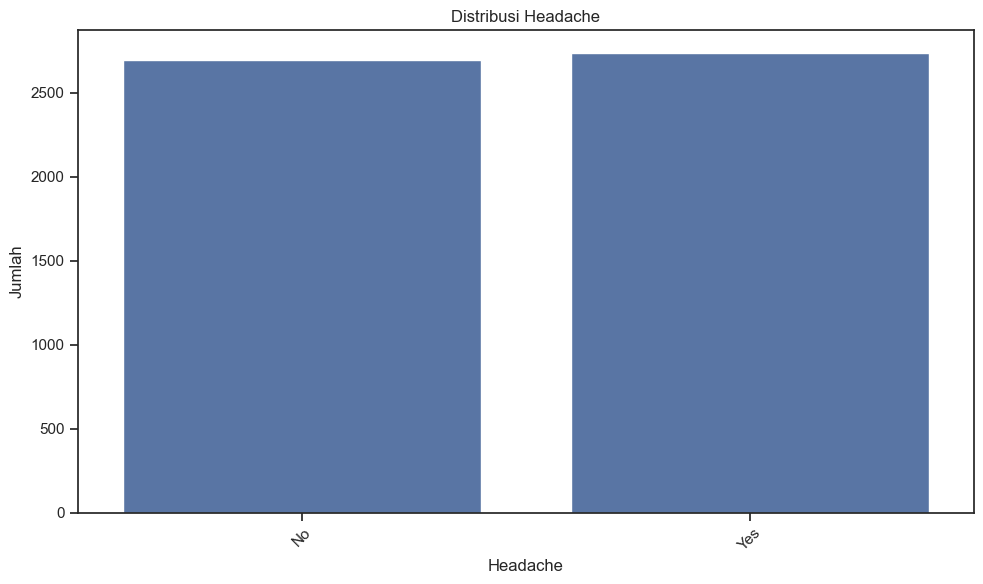

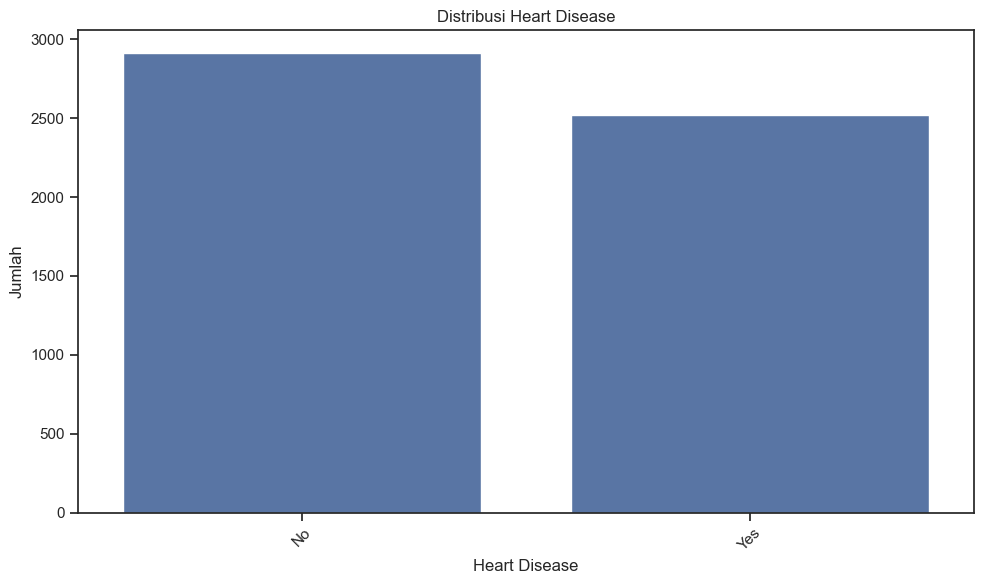

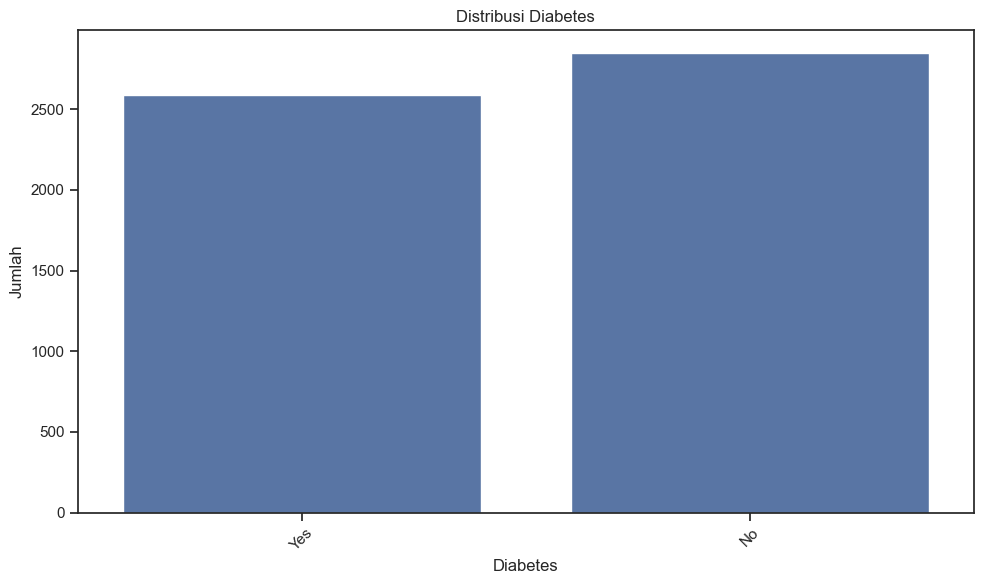

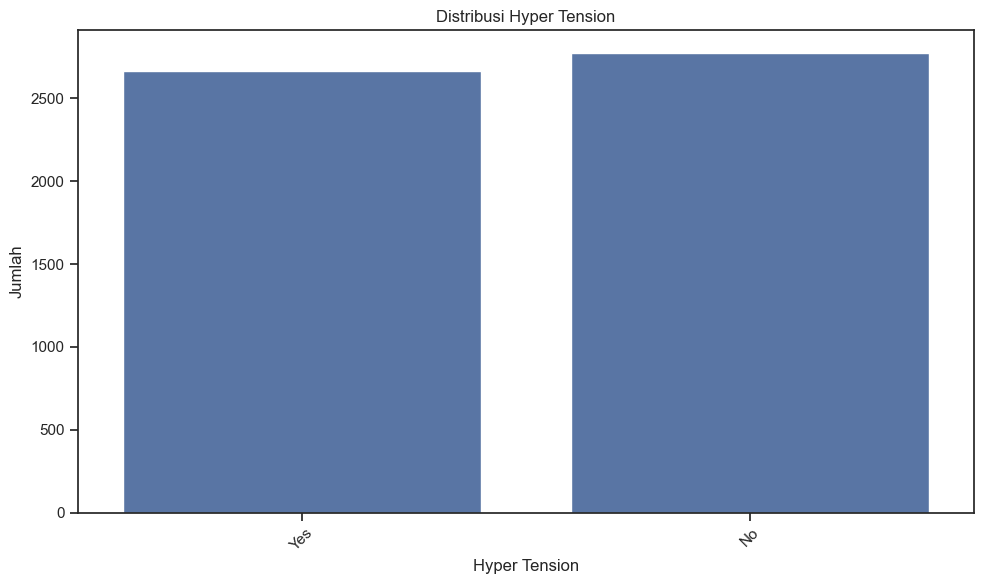

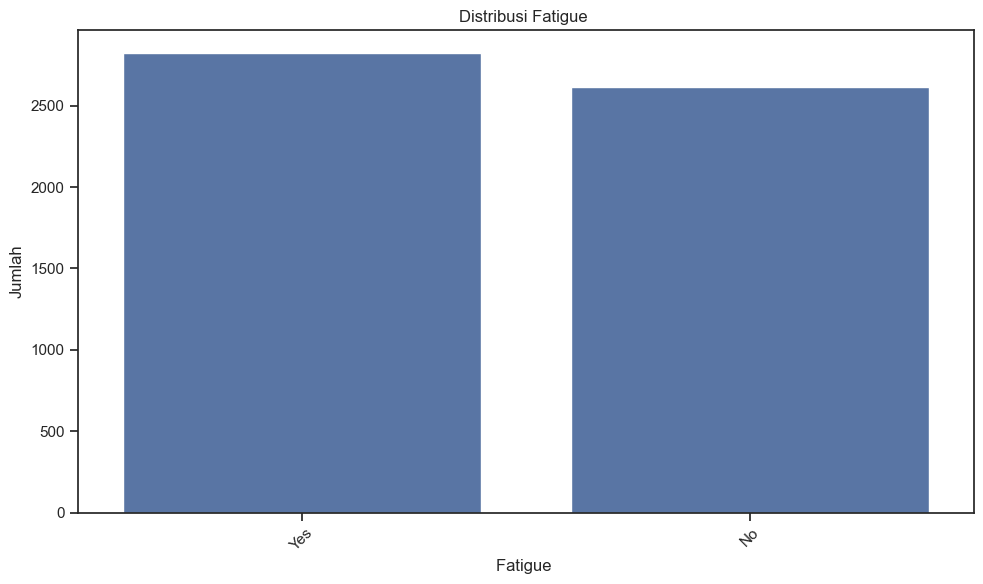

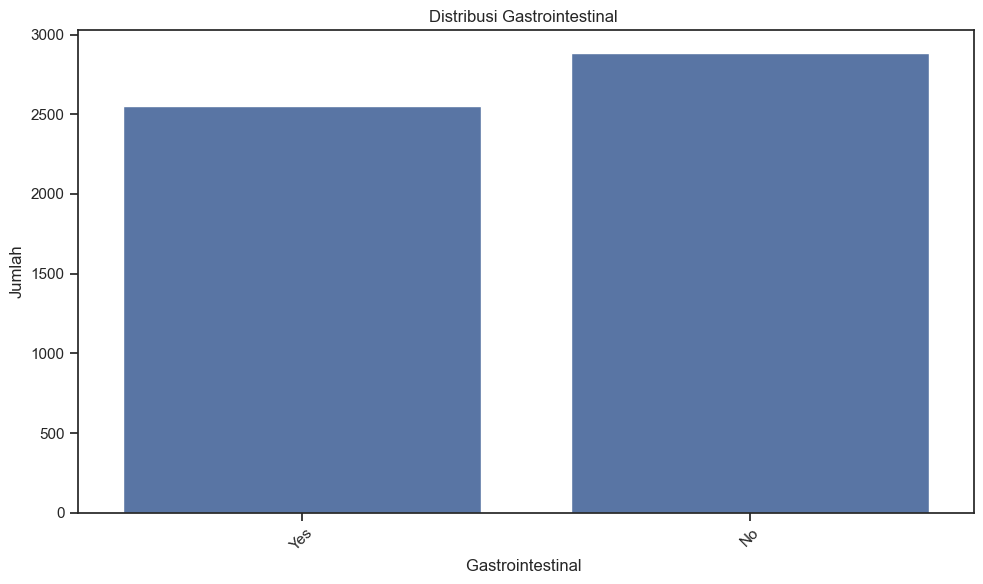

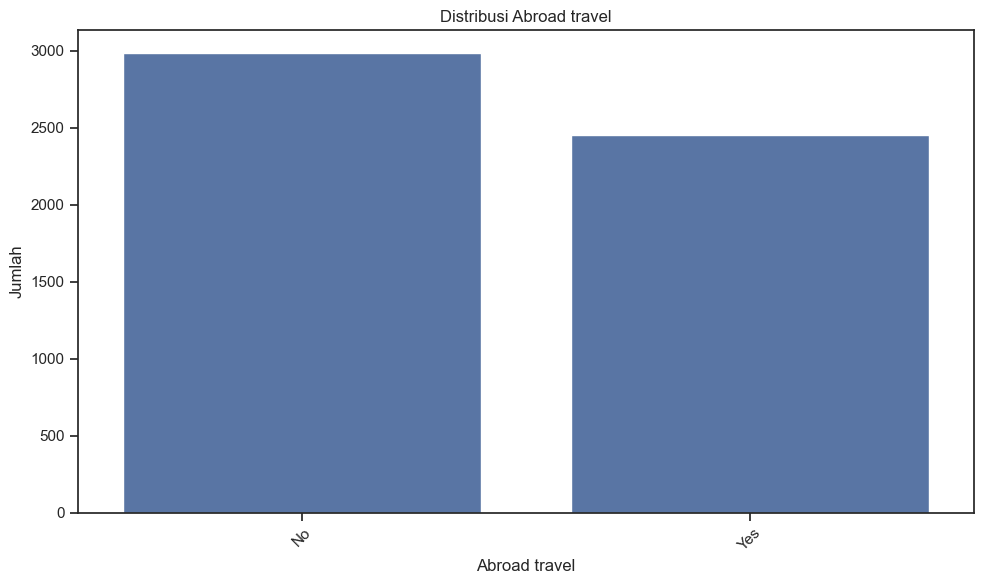

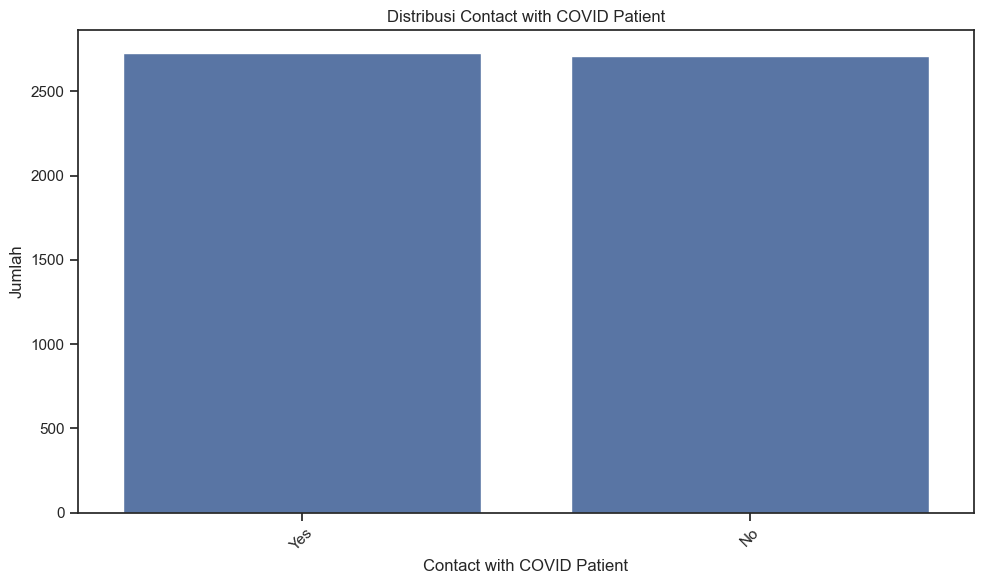

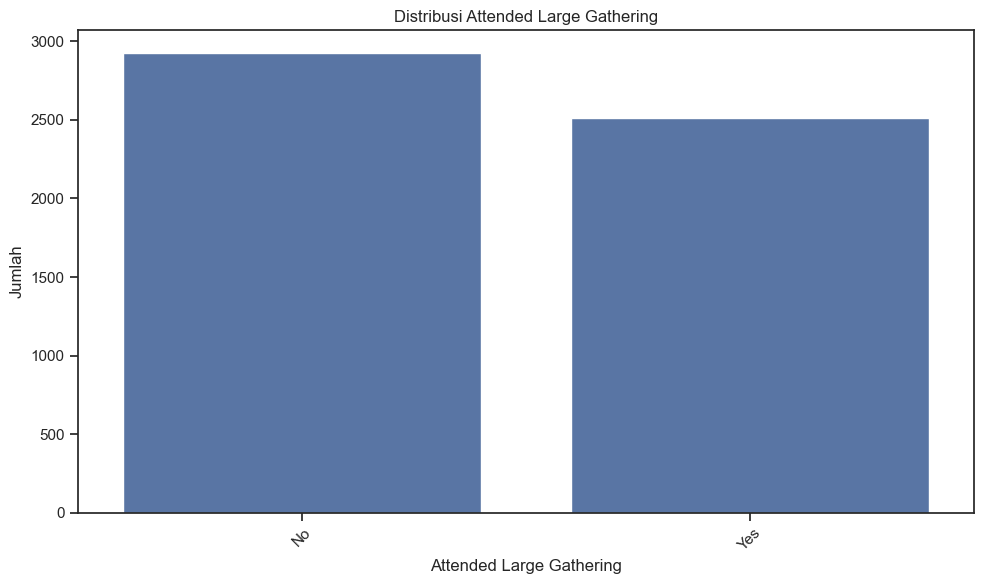

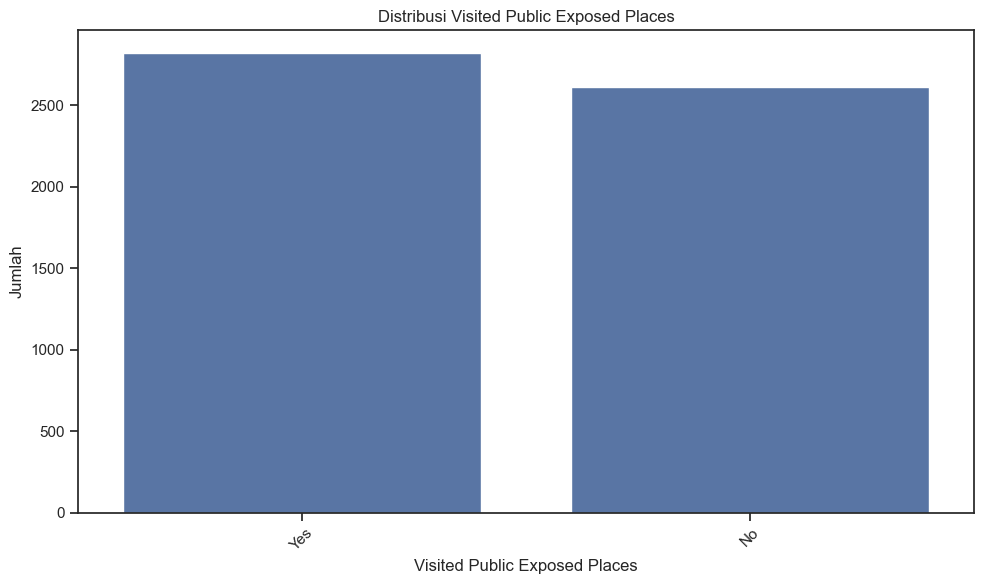

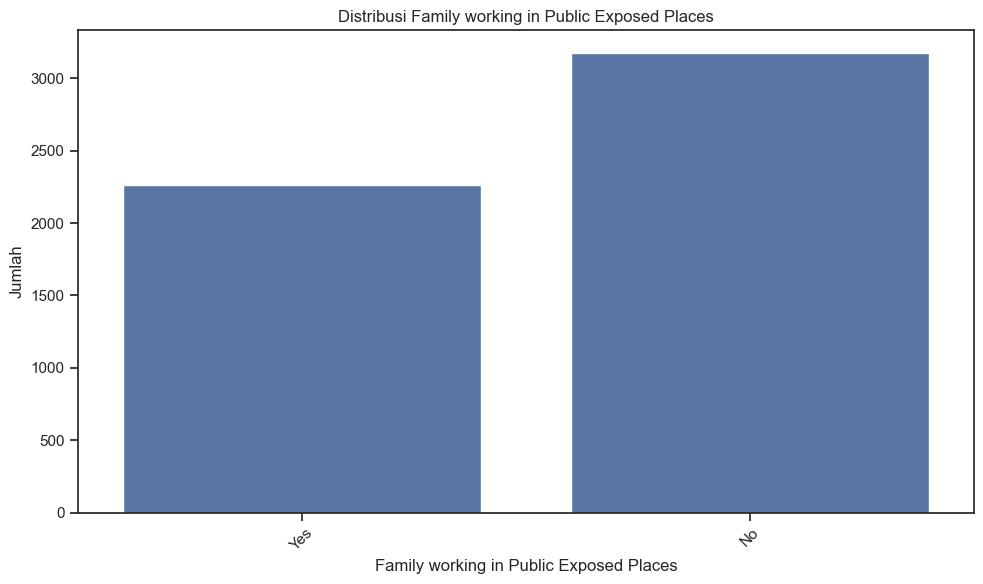

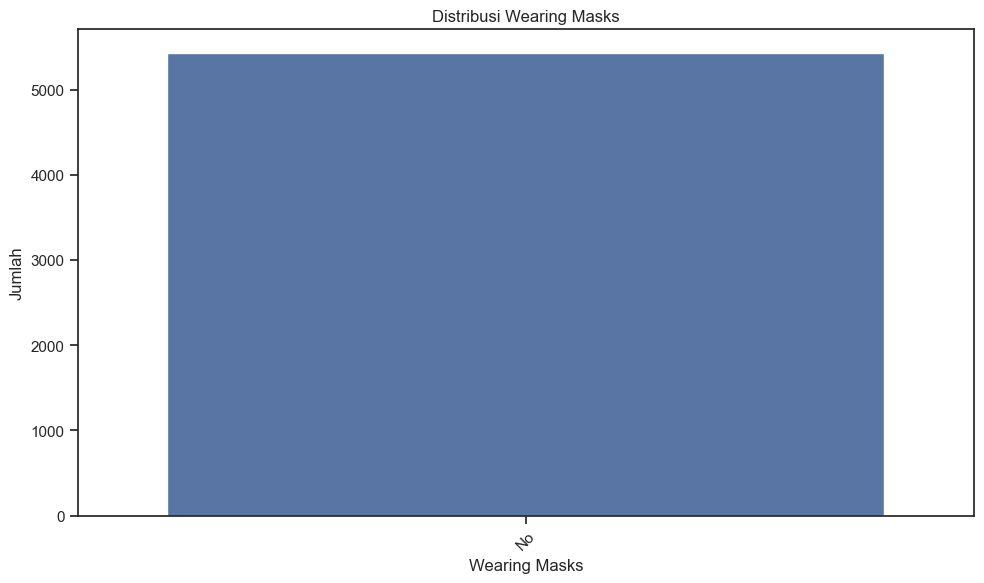

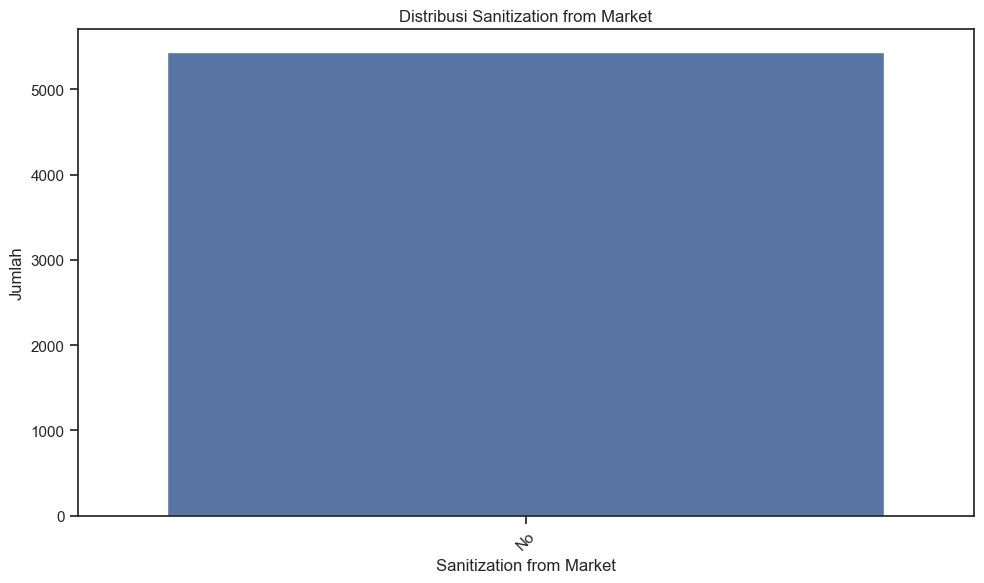

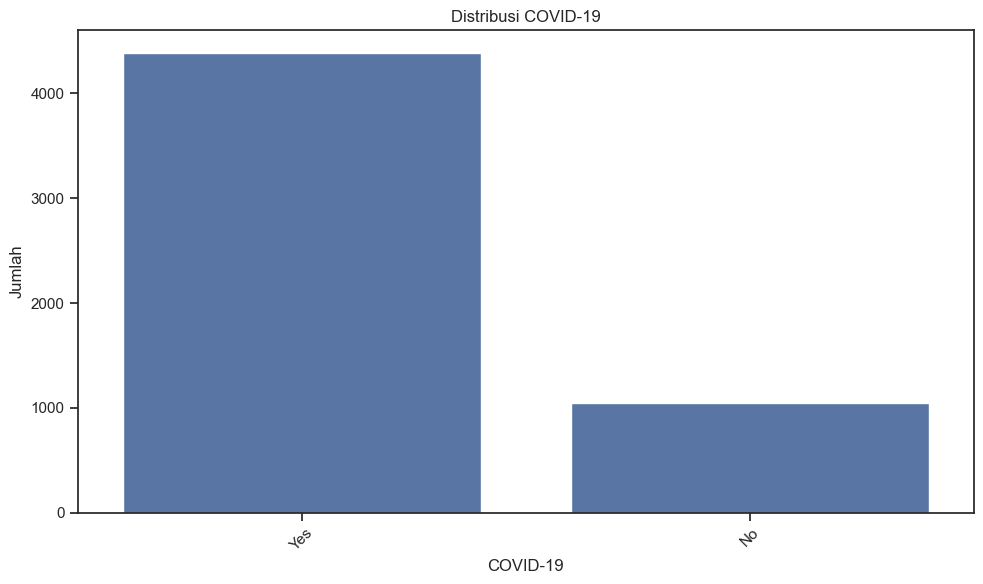

<Figure size 1000x600 with 0 Axes>

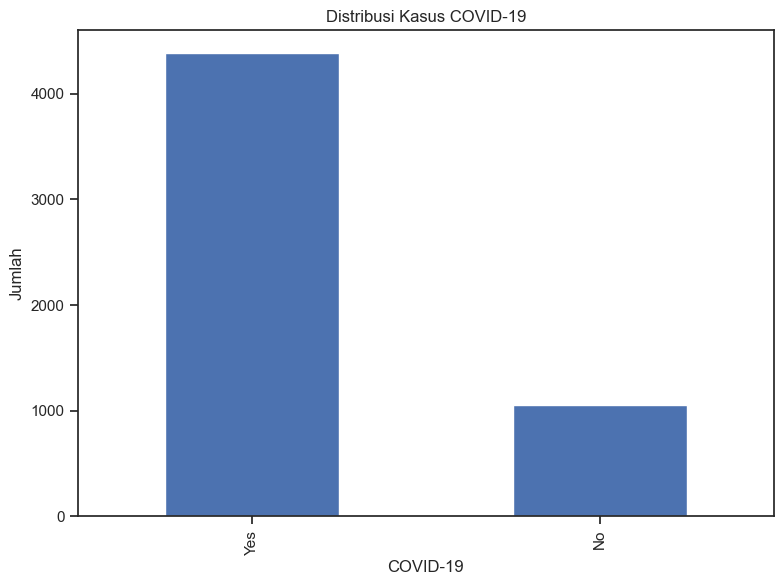

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Memuat dataset
df = pd.read_csv("Covid Dataset.csv")

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan beberapa baris pertama dari dataset
print("\n5 baris pertama dari dataset:")
print(df.head())

# Menampilkan statistik ringkasan kolom numerik
print("\nStatistik Ringkasan:")
print(df.describe())

# Memeriksa nilai yang hilang
print("\nNilai yang Hilang:")
print(df.isnull().sum())

# Menampilkan distribusi variabel target (COVID-19)
plt.figure(figsize=(8, 6))
df['COVID-19'].value_counts().plot(kind='bar')
plt.title('Distribusi Kasus COVID-19')
plt.xlabel('COVID-19')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan peta panas korelasi untuk kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Peta Panas Korelasi')
plt.show()

# Menampilkan distribusi beberapa fitur kunci
fitur_kunci = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, fitur in enumerate(fitur_kunci):
    sns.countplot(x=fitur, hue='COVID-19', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribusi {fitur}')
plt.tight_layout()
plt.show()

# 3. Data Preparation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
df = pd.read_csv("Covid Dataset.csv")

# Fungsi untuk membuat bar chart
def plot_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'barchart_{column}.png')  # Menyimpan grafik sebagai file
    plt.close()  # Menutup figur untuk menghemat memori

# Membuat bar chart untuk setiap atribut
for column in df.columns:
    plot_bar_chart(df, column)
    print(f"Bar chart untuk {column} telah disimpan.")

# Fungsi untuk membuat bar chart bertumpuk
def plot_stacked_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='COVID-19', data=data)
    plt.title(f'Distribusi {column} berdasarkan Status COVID-19')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='COVID-19', loc='upper right')
    plt.tight_layout()
    plt.savefig(f'stacked_barchart_{column}.png')  # Menyimpan grafik sebagai file
    plt.close()  # Menutup figur untuk menghemat memori

# Membuat bar chart bertumpuk untuk setiap atribut (kecuali 'COVID-19')
for column in df.columns:
    if column != 'COVID-19':
        plot_stacked_bar_chart(df, column)
        print(f"Bar chart bertumpuk untuk {column} telah disimpan.")

print("Semua grafik telah disimpan sebagai file PNG.")

Bar chart untuk Breathing Problem telah disimpan.
Bar chart untuk Fever telah disimpan.
Bar chart untuk Dry Cough telah disimpan.
Bar chart untuk Sore throat telah disimpan.
Bar chart untuk Running Nose telah disimpan.
Bar chart untuk Asthma telah disimpan.
Bar chart untuk Chronic Lung Disease telah disimpan.
Bar chart untuk Headache telah disimpan.
Bar chart untuk Heart Disease telah disimpan.
Bar chart untuk Diabetes telah disimpan.
Bar chart untuk Hyper Tension telah disimpan.
Bar chart untuk Fatigue  telah disimpan.
Bar chart untuk Gastrointestinal  telah disimpan.
Bar chart untuk Abroad travel telah disimpan.
Bar chart untuk Contact with COVID Patient telah disimpan.
Bar chart untuk Attended Large Gathering telah disimpan.
Bar chart untuk Visited Public Exposed Places telah disimpan.
Bar chart untuk Family working in Public Exposed Places telah disimpan.
Bar chart untuk Wearing Masks telah disimpan.
Bar chart untuk Sanitization from Market telah disimpan.
Bar chart untuk COVID-19 

# 4. Modelling

# 5. Evaluation

# 6. Deployment